Let's first import our sample.csv file. For this we need to use the csv module.

In [127]:
import csv
import sys
import numpy as np
import pandas as pd
import datetime
import dateutil.parser
import pytz
from datetime import tzinfo
from dateutil import parser
import matplotlib.pyplot as plt
from time import time
import matplotlib

plt.rcParams['figure.figsize'] = (20,10)

Now let's import our sample.csv file. First it would be a good idea to remove the first row of headings, since this data won't be needed now we have captured it.

In [5]:
reader = csv.reader(open('sample.csv' , 'rb'))
    
f=csv.writer(open('sample_top_row_removed.csv' , 'wb'))
    
for line in reader:
    if "dwt" not in line:
        f.writerow(line)
        

Now let's build some stats. We want to show how many ships pass through the port (note: the port is the same, Fawley) but don't stop in the port, on a daily and a weekly basis. Note: In a hint, we are told that not all stops at the port will be at the berth or the facility.

The "daily/weekly basis" wording should become clearer once we have had a look at the data. Perhaps it means to state for how long each of those events lasts for - a reasonable assumption.

It is clear that all the ships pass through the port, since there is a valid entry in the port_start_ts and port_end_ts columns for each ship/event. However from inspecting the data manually we can see that some of the port_end_ts entries are TIMENOW - this must mean that at the instance the data was pulled the ship was still at the the port. This is fine, but need to be aware of this for during coding.

It would be a good idea to use what data we have so far - column 8(i=7) looks very useful as it names the type of event. These will be either: berth_enter or berth_exit, enhanced_stop_begin or enhanced_stop_end, facility_enter or facility_exit, port_enter or port_exit (discovered this by simply sorting the data in Excel by alphabetical order). It is important to note that a port_enter and port_exit occurs for every vessel. Whether or not the others happen is for me to ascertain.

A good strategy therefore looks to be, for each port_enter and port_exit event, to collect the port_start_ts and port_end_ts data for that specific event. Then we can filter from this data set those ships which stop at the berth and/or the facility, or elsewhere in fact. BUT WHAT ABOUT THE HINT? Well some ships will stop in the port outside a berth or a facility - these will be those ships that have an enhanced_stop_begin/end but without the berth_enter/exit or facility_enter/exit. Additionally, thanks to Anton's answer to my question, we should also take a stop to be when a ship is in an area for more than, say, 1 hour.

So let's gather the port_start/end_ts data for each port entry which doesn't include a stop. One way to do that is to create a new file with only this data in it. So we need to filter out the data which does include a stop.

In [120]:
reader = csv.reader(open('sample_top_row_removed.csv' , 'rb'))
no_stops = csv.writer(open('sample_port_calls_no_stops.csv' , 'wb'))       #set up our write to files
stops = csv.writer(open('sample_port_calls_with_stops.csv' , 'wb'))


prev = [""] * 23       #need prev array to store previous line. 23 columns in sample file

prev[7] = [""]         #store prev entry in 7th column as zero to begin with. 7th column contains type of event

for col in reader:   
        
    if prev[7] == "port_enter" and col[7] == "port_exit":

        no_stops.writerow(prev)
        no_stops.writerow(col)
    
    if (prev[7] == "port_enter" and col[7] != "port_exit"): 
        
            stops.writerow(prev)
            
    if col[7] == "facility_enter" or col[7] == "berth_enter" or col[7] == "enhanced_stop_begin" or col[7] == "facility_exit" or col[7] == "berth_exit" or col[7] == "enhanced_stop_end":
            
            stops.writerow(col)

    if col[7] == "port_exit" and prev[7] != "port_enter":
    
            stops.writerow(col)
    
    prev[7] = col[7]
    prev = col  

#print 0
#Note: At this stage, size of no_stops file should be 884KB, with_stops = 1495600 bytes.

0


Okay so now we have organised our data into two set: one that contains ships that do not stop in the port and one for ships that do. Let's deal with the first task: 

1) build statistics which shows how many ships pass through the port but do not stop in the port on daily and weekly basis

This clearly suggests that we need to devise a way of displaying the time/date data in columns 17 and 18 (i=16, i=17) of the edited sample file, "sample_port_calls_no_stops.csv".

A good thing to do would be to devise a way to display this data visually. All we need is the number of individual ships, but we should keep track of each ship to check if they are returning or not - this is clearly beneficial from a common sense perspective! So how can we pull these numbers and make sense of them? We will need to do some kind of character recognition, but this is fine and doable in Python. Let's get going!

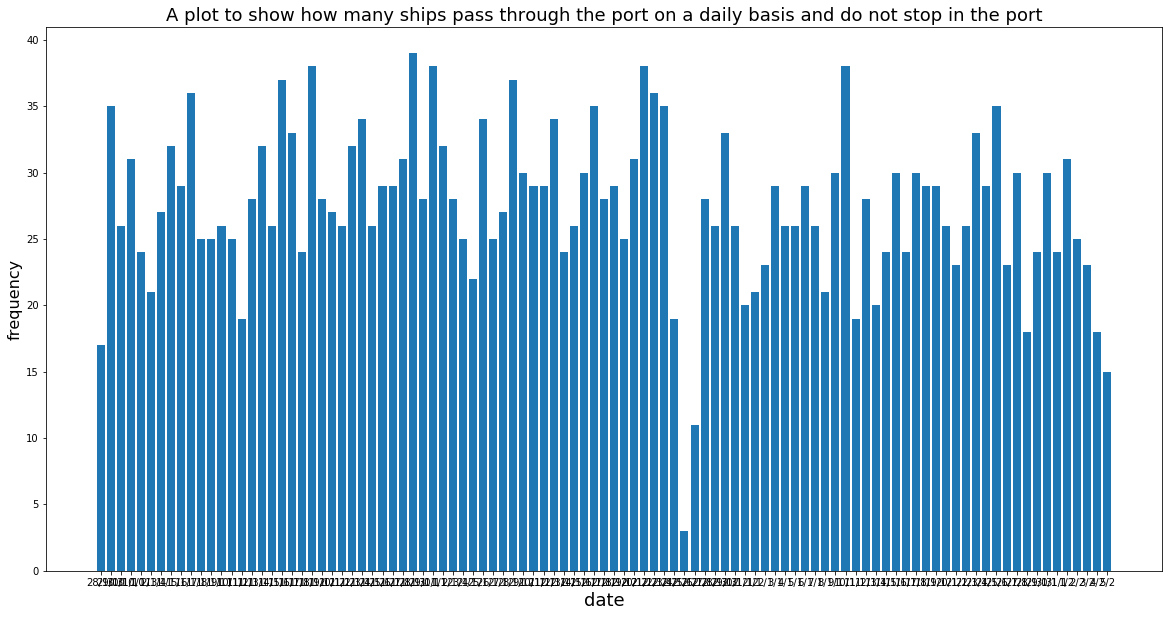

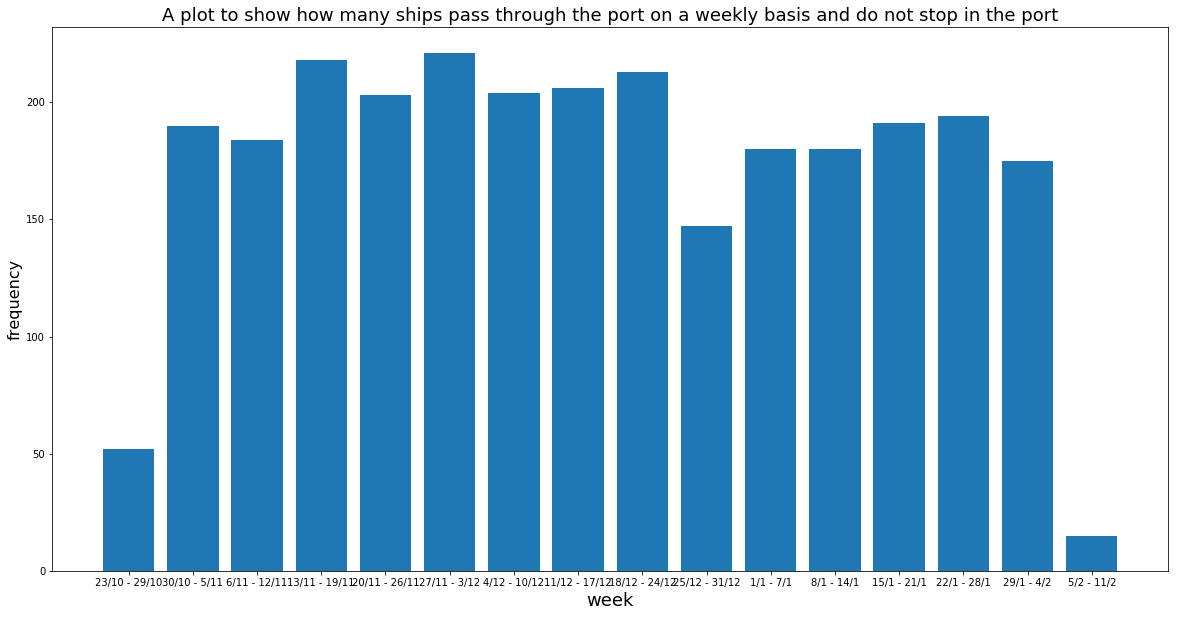

In [121]:
reader = csv.reader(open('sample_port_calls_no_stops.csv' , 'rb'))

year_count_2017 = 0
year_count_2018 = 0

month_count_Oct = 0
month_count_Nov = 0
month_count_Dec = 0
month_count_Jan = 0
month_count_Feb = 0    
    
arr_Oct_28 = 0
arr_Oct_29 = 0
arr_Oct_30 = 0
arr_Oct_31 = 0

arr_Nov_1 = 0       #note: there could have been a quicker way to do this bit
arr_Nov_2 = 0
arr_Nov_3 = 0
arr_Nov_4 = 0
arr_Nov_5 = 0
arr_Nov_6 = 0
arr_Nov_7 = 0
arr_Nov_8 = 0
arr_Nov_9 = 0
arr_Nov_10 = 0
arr_Nov_11 = 0
arr_Nov_12 = 0
arr_Nov_13 = 0
arr_Nov_14 = 0
arr_Nov_15 = 0
arr_Nov_16 = 0
arr_Nov_17 = 0
arr_Nov_18 = 0
arr_Nov_19 = 0
arr_Nov_20 = 0
arr_Nov_21 = 0
arr_Nov_22 = 0
arr_Nov_23 = 0
arr_Nov_24 = 0
arr_Nov_25 = 0
arr_Nov_26 = 0
arr_Nov_27 = 0
arr_Nov_28 = 0
arr_Nov_29 = 0
arr_Nov_30 = 0

arr_Dec_1 = 0
arr_Dec_2 = 0
arr_Dec_3 = 0
arr_Dec_4 = 0
arr_Dec_5 = 0
arr_Dec_6 = 0
arr_Dec_7 = 0
arr_Dec_8 = 0
arr_Dec_9 = 0
arr_Dec_10 = 0
arr_Dec_11 = 0
arr_Dec_12 = 0
arr_Dec_13 = 0
arr_Dec_14 = 0
arr_Dec_15 = 0
arr_Dec_16 = 0
arr_Dec_17 = 0
arr_Dec_18 = 0
arr_Dec_19 = 0
arr_Dec_20 = 0
arr_Dec_21 = 0
arr_Dec_22 = 0
arr_Dec_23 = 0
arr_Dec_24 = 0
arr_Dec_25 = 0
arr_Dec_26 = 0
arr_Dec_27 = 0
arr_Dec_28 = 0
arr_Dec_29 = 0
arr_Dec_30 = 0
arr_Dec_31 = 0

arr_Jan_1 = 0
arr_Jan_2 = 0
arr_Jan_3 = 0
arr_Jan_4 = 0
arr_Jan_5 = 0
arr_Jan_6 = 0
arr_Jan_7 = 0
arr_Jan_8 = 0
arr_Jan_9 = 0
arr_Jan_10 = 0
arr_Jan_11 = 0
arr_Jan_12 = 0
arr_Jan_13 = 0
arr_Jan_14 = 0
arr_Jan_15 = 0
arr_Jan_16 = 0
arr_Jan_17 = 0
arr_Jan_18 = 0
arr_Jan_19 = 0
arr_Jan_20 = 0
arr_Jan_21 = 0
arr_Jan_22 = 0
arr_Jan_23 = 0
arr_Jan_24 = 0
arr_Jan_25 = 0
arr_Jan_26 = 0
arr_Jan_27 = 0
arr_Jan_28 = 0
arr_Jan_29 = 0
arr_Jan_30 = 0
arr_Jan_31 = 0

arr_Feb_1 = 0
arr_Feb_2 = 0
arr_Feb_3 = 0
arr_Feb_4 = 0
arr_Feb_5 = 0
arr_Feb_6 = 0
arr_Feb_7 = 0
arr_Feb_8 = 0
arr_Feb_9 = 0
arr_Feb_10 = 0
arr_Feb_11 = 0
arr_Feb_12 = 0
arr_Feb_13 = 0
arr_Feb_14 = 0
arr_Feb_15 = 0
arr_Feb_16 = 0
arr_Feb_17 = 0
arr_Feb_18 = 0
arr_Feb_19 = 0
arr_Feb_20 = 0
arr_Feb_21 = 0
arr_Feb_22 = 0
arr_Feb_23 = 0
arr_Feb_24 = 0
arr_Feb_25 = 0
arr_Feb_26 = 0
arr_Feb_27 = 0
arr_Feb_28 = 0

#and now for the weekly totals - put second bit in for reference

wk1 = arr_wk_23_29_Oct_17 = 0
wk2 = arr_wk_30_Oct_5_Nov_17 = 0
wk3 = arr_wk_6_12_Nov_17 = 0
wk4 = arr_wk_13_19_Nov_17 = 0
wk5 = arr_wk_20_26_Nov_17 = 0
wk6 = arr_wk_27_Nov_3_Dec_17 = 0
wk7 = arr_wk_4_10_Dec_17 = 0
wk8 = arr_wk_11_17_Dec_17 = 0
wk9 = arr_wk_18_24_Dec_17 = 0
wk10 = arr_wk_25_31_Dec_17 = 0
wk11 = arr_wk_1_7_Jan_18 = 0
wk12 = arr_wk_8_14_Jan_18 = 0
wk13 = arr_wk_15_21_Jan_18 = 0
wk14 = arr_wk_22_28_Jan_18 = 0
wk15 = arr_wk_29_Jan_4_Feb_18 = 0
wk16 = arr_wk_5_11_Feb_18 = 0


for col in reader:
    
    list_arr = col[16]         #capture our column of arrival dates/times from data set
    
  #  list_dep = col[17]         #and likewise for the departure dates/times, if needed later
    
    arr = parser.parse(list_arr)

    
#keep track of the year


    if arr.year == 2017:
        
        year_count_2017 += 1
        
    if arr.year == 2018:
        
        year_count_2018 += 1
        
        
#October:


    if arr.month == 10:
       
        month_count_Oct += 1
 
        if arr.day == 28:
            
            arr_Oct_28 += 1
            wk1 += 1
        
        if arr.day == 29:
            
            arr_Oct_29 += 1
            wk1 += 1
            
        if arr.day == 30:
            
            arr_Oct_30 += 1
            wk2 += 1
            
        if arr.day == 31:
            
            arr_Oct_31 += 1
            wk2 += 1
                
                
#November:
                
    
    if arr.month == 11:
            
            month_count_Nov += 1
            
            if arr.day == 1:
                
                arr_Nov_1 += 1
                wk2 += 1
                
            if arr.day == 2:
                
                arr_Nov_2 += 1
                wk2 += 1
                
            if arr.day == 3:
                
                arr_Nov_3 += 1
                wk2 += 1
                
            if arr.day == 4:
                
                arr_Nov_4 += 1
                wk2 += 1
                
            if arr.day == 5:
                
                arr_Nov_5 += 1
                wk2 += 1
                
            if arr.day == 6:
                
                arr_Nov_6 += 1
                wk3 += 1
                
            if arr.day == 7:
                
                arr_Nov_7 += 1
                wk3 += 1
                
            if arr.day == 8:
                
                arr_Nov_8 += 1
                wk3 += 1
                
            if arr.day == 9:
                
                arr_Nov_9 += 1
                wk3 += 1
                
            if arr.day == 10:
                
                arr_Nov_10 += 1
                wk3 += 1
                
            if arr.day == 11:
                
                arr_Nov_11 += 1
                wk3 += 1
                
            if arr.day == 12:
                
                arr_Nov_12 += 1
                wk3 += 1
                
            if arr.day == 13:
                
                arr_Nov_13 += 1
                wk4 += 1
                
            if arr.day == 14:
                
                arr_Nov_14 += 1
                wk4 += 1
                
            if arr.day == 15:
                
                arr_Nov_15 += 1
                wk4 += 1
                
            if arr.day == 16:
                
                arr_Nov_16 += 1
                wk4 += 1
                
            if arr.day == 17:
                
                arr_Nov_17 += 1
                wk4 += 1
                
            if arr.day == 18:
                
                arr_Nov_18 += 1
                wk4 += 1
                
            if arr.day == 19:
                
                arr_Nov_19 += 1
                wk4 += 1
                
            if arr.day == 20:
                
                arr_Nov_20 += 1
                wk5 += 1
                
            if arr.day == 21:
                
                arr_Nov_21 += 1
                wk5 += 1
                
            if arr.day == 22:
                
                arr_Nov_22 += 1
                wk5 += 1
                
            if arr.day == 23:
                
                arr_Nov_23 += 1
                wk5 += 1
                
            if arr.day == 24:
                
                arr_Nov_24 += 1
                wk5 += 1
                
            if arr.day == 25:
                
                arr_Nov_25 += 1
                wk5 += 1
                
            if arr.day == 26:
                
                arr_Nov_26 += 1
                wk5 += 1
                
            if arr.day == 27:
                
                arr_Nov_27 += 1
                wk6 += 1
                
            if arr.day == 28:
                
                arr_Nov_28 += 1
                wk6 += 1
                
            if arr.day == 29:
                
                arr_Nov_29 += 1
                wk6 += 1
                
            if arr.day == 30:
                
                arr_Nov_30 += 1
                wk6 += 1

                
#December:            


    if arr.month == 12:
            
            month_count_Dec += 1
            
            if arr.day == 1:
                
                arr_Dec_1 += 1
                wk6 += 1
                
            if arr.day == 2:
                
                arr_Dec_2 += 1
                wk6 += 1
                
            if arr.day == 3:
                
                arr_Dec_3 += 1
                wk6 += 1
                
            if arr.day == 4:
                
                arr_Dec_4 += 1
                wk7 += 1
                
            if arr.day == 5:
                
                arr_Dec_5 += 1
                wk7 += 1
                
            if arr.day == 6:
                
                arr_Dec_6 += 1
                wk7 += 1
                
            if arr.day == 7:
                
                arr_Dec_7 += 1
                wk7 += 1
                
            if arr.day == 8:
                
                arr_Dec_8 += 1
                wk7 += 1
                
            if arr.day == 9:
                
                arr_Dec_9 += 1
                wk7 += 1
                
            if arr.day == 10:
                
                arr_Dec_10 += 1
                wk7 += 1
                
            if arr.day == 11:
                
                arr_Dec_11 += 1
                wk8 += 1
                
            if arr.day == 12:
                
                arr_Dec_12 += 1
                wk8 += 1
                
            if arr.day == 13:
                
                arr_Dec_13 += 1
                wk8 += 1
                
            if arr.day == 14:
                
                arr_Dec_14 += 1
                wk8 += 1
                
            if arr.day == 15:
                
                arr_Dec_15 += 1
                wk8 += 1
                
            if arr.day == 16:
                
                arr_Dec_16 += 1
                wk8 += 1
                
            if arr.day == 17:
                
                arr_Dec_17 += 1
                wk8 += 1
                
            if arr.day == 18:
                
                arr_Dec_18 += 1
                wk9 += 1
                
            if arr.day == 19:
                
                arr_Dec_19 += 1
                wk9 += 1
                
            if arr.day == 20:
                
                arr_Dec_20 += 1
                wk9 += 1
                
            if arr.day == 21:
                
                arr_Dec_21 += 1
                wk9 += 1
                
            if arr.day == 22:
                
                arr_Dec_22 += 1
                wk9 += 1
                
            if arr.day == 23:
                
                arr_Dec_23 += 1
                wk9 += 1
                
            if arr.day == 24:
                
                arr_Dec_24 += 1
                wk9 += 1
                
            if arr.day == 25:
                
                arr_Dec_25 += 1
                wk10 += 1
                
            if arr.day == 26:
                
                arr_Dec_26 += 1
                wk10 += 1
                
            if arr.day == 27:
                
                arr_Dec_27 += 1
                wk10 += 1
                
            if arr.day == 28:
                
                arr_Dec_28 += 1
                wk10 += 1
                
            if arr.day == 29:
                
                arr_Dec_29 += 1
                wk10 += 1
                
            if arr.day == 30:
                
                arr_Dec_30 += 1
                wk10 += 1
                
            if arr.day == 31:
                
                arr_Dec_31 += 1
                wk10 += 1

                
#January:


    if arr.month == 1:
        
            month_count_Jan += 1
            
            if arr.day == 1:
                
                arr_Jan_1 += 1
                wk11 += 1
                
            if arr.day == 2:
                
                arr_Jan_2 += 1
                wk11 += 1
                
            if arr.day == 3:
                
                arr_Jan_3 += 1
                wk11 += 1
                
            if arr.day == 4:
                
                arr_Jan_4 += 1
                wk11 += 1
                
            if arr.day == 5:
                
                arr_Jan_5 += 1
                wk11 += 1
                
            if arr.day == 6:
                
                arr_Jan_6 += 1
                wk11 += 1
                
            if arr.day == 7:
                
                arr_Jan_7 += 1
                wk11 += 1
                
            if arr.day == 8:
                
                arr_Jan_8 += 1
                wk12 += 1
                
            if arr.day == 9:
                
                arr_Jan_9 += 1
                wk12 += 1
                
            if arr.day == 10:
                
                arr_Jan_10 += 1
                wk12 += 1
                
            if arr.day == 11:
                
                arr_Jan_11 += 1
                wk12 += 1
                
            if arr.day == 12:
                
                arr_Jan_12 += 1
                wk12 += 1
                
            if arr.day == 13:
                
                arr_Jan_13 += 1
                wk12 += 1
                
            if arr.day == 14:
                
                arr_Jan_14 += 1
                wk12 += 1
                
            if arr.day == 15:
                
                arr_Jan_15 += 1
                wk13 += 1
                
            if arr.day == 16:
                
                arr_Jan_16 += 1
                wk13 += 1
                
            if arr.day == 17:
                
                arr_Jan_17 += 1
                wk13 += 1
                
            if arr.day == 18:
                
                arr_Jan_18 += 1
                wk13 += 1
                
            if arr.day == 19:
                
                arr_Jan_19 += 1
                wk13 += 1
                
            if arr.day == 20:
                
                arr_Jan_20 += 1
                wk13 += 1
                
            if arr.day == 21:
                
                arr_Jan_21 += 1
                wk13 += 1
                
            if arr.day == 22:
                
                arr_Jan_22 += 1
                wk14 += 1
                
            if arr.day == 23:
                
                arr_Jan_23 += 1
                wk14 += 1
                
            if arr.day == 24:
                
                arr_Jan_24 += 1
                wk14 += 1
                
            if arr.day == 25:
                
                arr_Jan_25 += 1
                wk14 += 1
                
            if arr.day == 26:
                
                arr_Jan_26 += 1
                wk14 += 1
                
            if arr.day == 27:
                
                arr_Jan_27 += 1
                wk14 += 1
                
            if arr.day == 28:
                
                arr_Jan_28 += 1
                wk14 += 1
                
            if arr.day == 29:
                
                arr_Jan_29 += 1
                wk15 += 1
                
            if arr.day == 30:
                
                arr_Jan_30 += 1
                wk15 += 1
                
            if arr.day == 31:
                
                arr_Jan_31 += 1
                wk15 += 1
                
         
 #February:        
      
    
    if arr.month == 2:
        
            month_count_Feb += 1
            
            if arr.day == 1:
                
                arr_Feb_1 += 1
                wk15 += 1
                
            if arr.day == 2:
                
                arr_Feb_2 += 1
                wk15 += 1
                
            if arr.day == 3:
                
                arr_Feb_3 += 1
                wk15 += 1
                
            if arr.day == 4:
                
                arr_Feb_4 += 1
                wk15 += 1
                
            if arr.day == 5:
                
                arr_Feb_5 += 1
                wk16 += 1
       

 #Note: we need to divide by two since for every data entry there is a port entry and port departure, but this information 
#is captured in just one of the rows


x_day = (arr_Oct_28,arr_Oct_29,arr_Oct_30,arr_Oct_31,arr_Nov_1,arr_Nov_2,arr_Nov_3,arr_Nov_4,arr_Nov_5,arr_Nov_6,arr_Nov_7,arr_Nov_8,arr_Nov_9,arr_Nov_10,arr_Nov_11,arr_Nov_12,arr_Nov_13,arr_Nov_14,arr_Nov_15,arr_Nov_16,arr_Nov_17,arr_Nov_18,arr_Nov_19,arr_Nov_20,arr_Nov_21,arr_Nov_22,arr_Nov_23,arr_Nov_24,arr_Nov_25,arr_Nov_26,arr_Nov_27,arr_Nov_28,arr_Nov_29,arr_Nov_30,arr_Dec_1,arr_Dec_2,arr_Dec_3,arr_Dec_4,arr_Dec_5,arr_Dec_6,arr_Dec_7,arr_Dec_8,arr_Dec_9,arr_Dec_10,arr_Dec_11,arr_Dec_12,arr_Dec_13,arr_Dec_14,arr_Dec_15,arr_Dec_16,arr_Dec_17,arr_Dec_18,arr_Dec_19,arr_Dec_20,arr_Dec_21,arr_Dec_22,arr_Dec_23,arr_Dec_24,arr_Dec_25,arr_Dec_26,arr_Dec_27,arr_Dec_28,arr_Dec_29,arr_Dec_30,arr_Dec_31,arr_Jan_1,arr_Jan_2,arr_Jan_3,arr_Jan_4,arr_Jan_5,arr_Jan_6,arr_Jan_7,arr_Jan_8,arr_Jan_9,arr_Jan_10,arr_Jan_11,arr_Jan_12,arr_Jan_13,arr_Jan_14,arr_Jan_15,arr_Jan_16,arr_Jan_17,arr_Jan_18,arr_Jan_19,arr_Jan_20,arr_Jan_21,arr_Jan_22,arr_Jan_23,arr_Jan_24,arr_Jan_25,arr_Jan_26,arr_Jan_27,arr_Jan_28,arr_Jan_29,arr_Jan_30,arr_Jan_31,arr_Feb_1,arr_Feb_2,arr_Feb_3,arr_Feb_4,arr_Feb_5)
x_day_correct = tuple(i/2 for i in x_day)

y_day = ["28/10","29/10","30/10","31/10","1/11","2/11","3/11","4/11","5/11","6/11","7/11","8/11","9/11","10/11","11/11","12/11","13/11","14/11","15/11","16/11","17/11","18/11","19/11","20/11","21/11","22/11","23/11","24/11","25/11","26/11","27/11","28/11","29/11","30/11","1/12","2/12","3/12","4/12","5/12","6/12","7/12","8/12","9/12","10/12","11/12","12/12","13/12","14/12","15/12","16/12","17/12","18/12","19/12","20/12","21/12","22/12","23/12","24/12","25/12","26/12","27/12","28/12","29/12","30/12","31/12","1/1","2/1","3/1","4/1","5/1","6/1","7/1","8/1","9/1","10/1","11/1","12/1","13/1","14/1","15/1","16/1","17/1","18/1","19/1","20/1","21/1","22/1","23/1","24/1","25/1","26/1","27/1","28/1","29/1","30/1","31/1","1/2","2/2","3/2","4/2","5/2"]


plt.figure(figsize=(20,10))

plt.bar(y_day,x_day_correct)

plt.title('A plot to show how many ships pass through the port on a daily basis and do not stop in the port',fontsize=18)
plt.xlabel('date', fontsize=18)
plt.ylabel('frequency', fontsize=16)
plt.show()


#now let's do the weekly plot

x_week = (wk1,wk2,wk3,wk4,wk5,wk6,wk7,wk8,wk9,wk10,wk11,wk12,wk13,wk14,wk15,wk16)
x_week_correct = tuple(i/2 for i in x_week)

y_week = ["23/10 - 29/10" , "30/10 - 5/11" , "6/11 - 12/11" , "13/11 - 19/11" , "20/11 - 26/11" , "27/11 - 3/12" , "4/12 - 10/12" , "11/12 - 17/12" , "18/12 - 24/12" , "25/12 - 31/12" , "1/1 - 7/1" , "8/1 - 14/1" , "15/1 - 21/1" , "22/1 - 28/1" , "29/1 - 4/2" , "5/2 - 11/2"]

plt.figure(figsize=(20,10))

plt.bar(y_week,x_week_correct)

plt.title('A plot to show how many ships pass through the port on a weekly basis and do not stop in the port',fontsize=18)
plt.xlabel('week', fontsize=18)
plt.ylabel('frequency', fontsize=16)
plt.show()


Okay so now we have completed the second part of the task (although we should go back and make sure we have included all the correct ships, i.e. those that don't stop at all. Also we might like to include the duration of the port stay in these stats too. Can do this later Peter.)

The third task is:

3. for ships that do stop inside the port, build statistics on types of ships and sizes (dwt)

So a logical approach would perhaps be to filter out all the ships that have an enhanced stop. This information is contained in column 8 again (i=7). We note that we don't actually have a time for the enhanced time stop begin/end - only the time that that ship enter either the berth or the facility (along with the port).

Perhaps the first thing to check is if there are any ships that enter a facility ONLY and have an enhanced stop (i.e. they don't enter a berth at all during that time) - there are!

I note from a quick scan through the sample data file that there ARE ships that enter a facility and exit, then re-enter the facility and then go into a berth....

We note that we are not given the enhanced stop begin/end time in the sample data file. That is okay though I think - we assume that a berth entry time/berth exit time contains that information. And similarly for the facility enter time/facility exit time if it includes an enhanced stop, and if the time spent in the facility/berth/port is above a certain threshold time parameter.

Also we should consider Anton's answer to my query, upon asking if an entrance to a facility can include a stop. He replied that we might consider setting a time limit (say an hour - make this a variable!) for an entrance into a facility to be included as a stop.

So a good plan of action is to:

a) for every enhanced stop event, pull the time information for that event, along with dwt and vessel_type

b) for every facility enter, and every berth enter, check to see if the time between entrance and exit is above a certain time threshold parameter (let's say 1 hour). If it is, pull the time information for that event, along with the dwt and vessel_type

So let's get going!

Time unknown due to being in port at time data drawn
Time unknown due to being in port at time data drawn
Time unknown due to being in port at time data drawn
Time unknown due to being in port at time data drawn
Time unknown due to being in port at time data drawn
Time unknown due to being in port at time data drawn
Time unknown due to being in port at time data drawn
Time unknown due to being in port at time data drawn


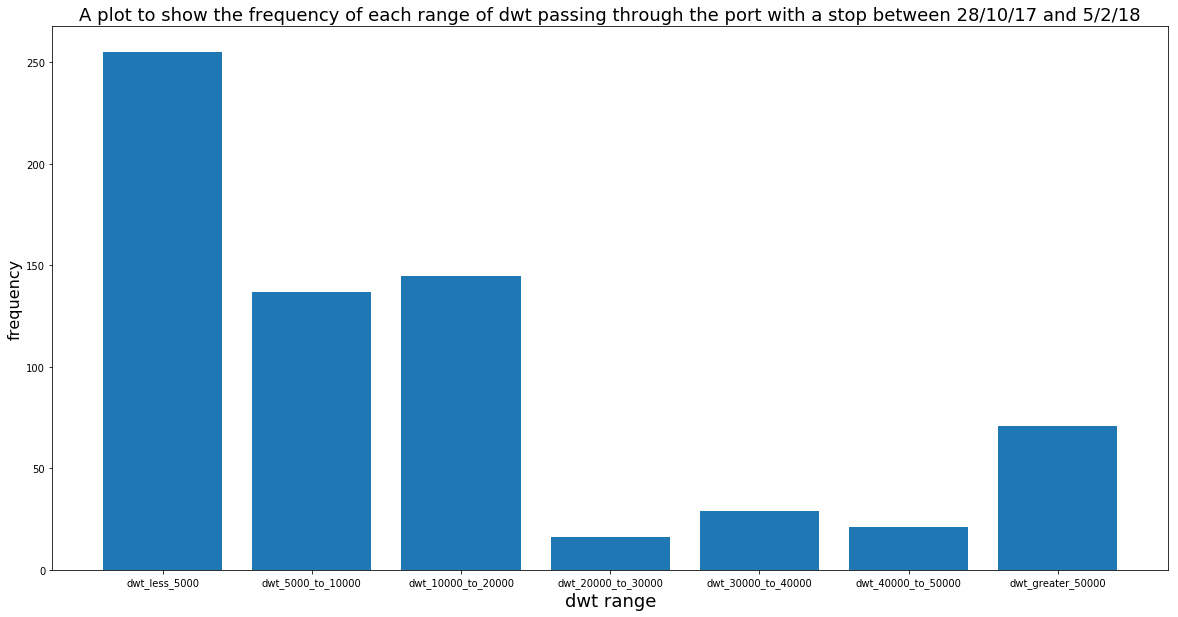

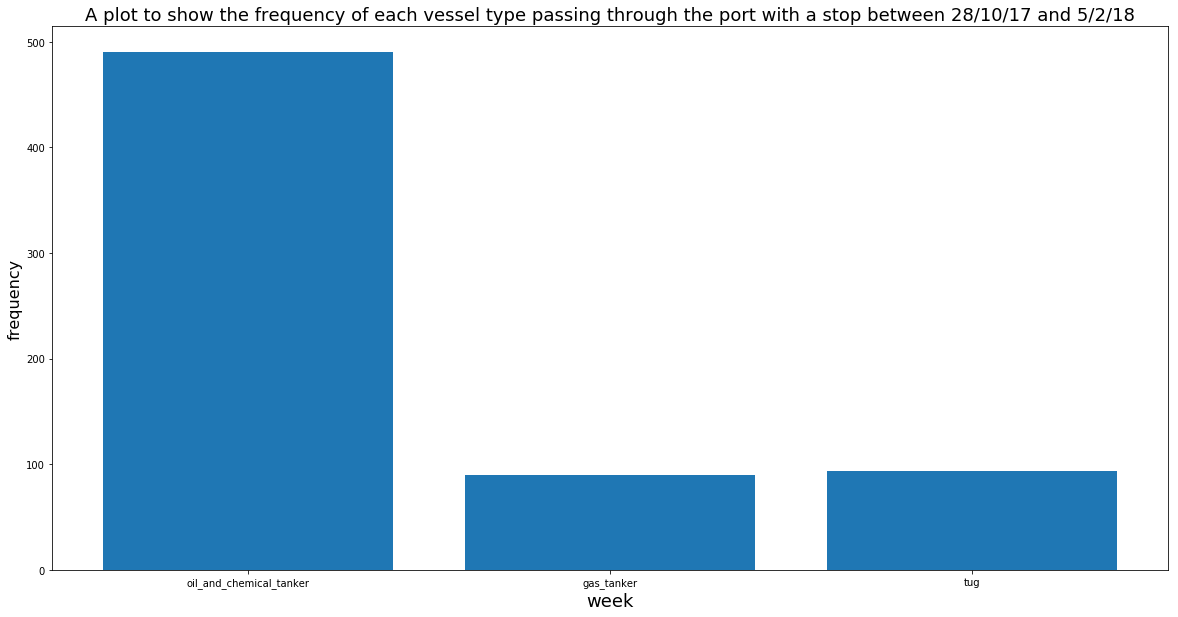

In [140]:
reader = csv.reader(open('sample_port_calls_with_stops.csv' , 'rb'))
no_stops_more = csv.writer(open('sample_port_calls_no_stops_more.csv' , 'wb'))

prev = [""] * 23
prev[7] = [""]

dwt = []
type_of_vessel = []

T_max = 3600        #this is the max time we set to define a stop, in seconds. Set to 1 hour = 60s * 60s = 3600s 


for col in reader:
    
    
    if prev[7] == "facility_enter" and col[7] == "facility_exit":
        
        if col[17] !=  "TIMENOW" and col[19] != "TIMENOW" and col[21]  != "TIMENOW":
        
            t_enh_stop_begin_facility = col[18]
            t_enh_stop_end_facility = col[19]
        
            t_facility_begin = parser.parse(t_enh_stop_begin_facility)
            t_facility_end = parser.parse(t_enh_stop_end_facility)
        
            t_facility_delta = t_facility_end - t_facility_begin
        
            if t_facility_delta.total_seconds() > T_max:

                #print "ship stopped fully at facility"
                
                type_of_vessel.append(col[2])
                dwt.append(col[6])
                
            else:
                
                #print "NO STOP in facility"
                
                no_stops_more.writerow(prev)
                no_stops_more.writerow(col)
                
        else:
            
            print "Time unknown due to being in port at time data drawn"
        
        
    if prev[7] == "berth_enter" and col[7] == "berth_exit":
        
        if col[17] !=  "TIMENOW" and col[19] != "TIMENOW" and col[21]  != "TIMENOW":
        
            t_enh_stop_begin_berth = col[20]
            t_enh_stop_end_berth = col[21]
    
            t_berth_begin = parser.parse(t_enh_stop_begin_berth)
            t_berth_end = parser.parse(t_enh_stop_end_berth)
        
            t_berth_delta = t_berth_end - t_berth_begin
        
            if t_berth_delta.total_seconds() > T_max:

                #print "ship stopped fully at berth"
                
                type_of_vessel.append(col[2])
                dwt.append(col[6])
                
            else:
                
                #print "NO STOP in berth"
                
                no_stops_more.writerow(prev)
                no_stops_more.writerow(col)
        
        else:
            
            print "Time unknown due to being in port at time data drawn"

        
    if prev[7] == "enhanced_stop_begin" and col[7] == "enhanced_stop_end":
        
        if col[17] !=  "TIMENOW" and col[19] != "TIMENOW" and col[21]  != "TIMENOW":
            
            t_enh_stop_begin = col[20]
            t_enh_stop_end = col[21]
        
            t_enh_begin = parser.parse(t_enh_stop_begin)
            t_enh_end = parser.parse(t_enh_stop_end)
        
            t_enh_stop_delta = t_enh_end - t_enh_begin
        
            if t_enh_stop_delta.total_seconds() > T_max:

                #print "ship stopped fully for enhanced stop"
                
                type_of_vessel.append(col[2])
                dwt.append(col[6])
                
            else:
                
                #print "NO STOP for enhanced stop"
                
                no_stops_more.writerow(prev)
                no_stops_more.writerow(col)
        
        else:
            
            print "Time unknown due to being in port at time data drawn"
        
    if prev[7] == "berth_enter" and col[7] == "enhanced_stop_begin":
        
        if col[17] !=  "TIMENOW" and col[19] != "TIMENOW" and col[21]  != "TIMENOW":
        
            t_enh_stop_begin = col[20]
            t_enh_stop_end = col[21]
        
            t_enh_begin = parser.parse(t_enh_stop_begin)
            t_enh_end = parser.parse(t_enh_stop_end)
        
            t_enh_stop_delta = t_enh_end - t_enh_begin
        
            if t_enh_stop_delta.total_seconds() > T_max:

                #print "ship stopped fully for enhanced stop in berth"
                
                type_of_vessel.append(col[2])
                dwt.append(col[6])
                
            else:
                
                #print "NO STOP for enhanced stop in berth"
                
                no_stops_more.writerow(prev)
                no_stops_more.writerow(col)

        else:
            
            print "Time unknown due to being in port at time data drawn"       

        
   # if prev[7] == "berth_exit" and col[7] == "berth_enter":
        
    #    if col[17] !=  "TIMENOW" and col[19] != "TIMENOW" and col[21]  != "TIMENOW":
        
     #       t_enh_stop_begin_berth = col[20]
      #      t_enh_stop_end_berth = col[21]
    
       #     t_berth_begin = parser.parse(t_enh_stop_begin_berth)
        #    t_berth_end = parser.parse(t_enh_stop_end_berth)
        
         #   t_berth_delta = t_berth_end - t_berth_begin
        
          #  if t_berth_delta.total_seconds() > T_max:

                #print "ship stopped fully at berth for another time"
                
           #     type_of_vessel.append(col[2])
            #    dwt.append(col[6])
                
          #  else:
                
                #print "NO STOP in berth for another time"
                
          #      no_stops_more.writerow(prev)
           #     no_stops_more.writerow(col)
        
      #  else:
            
       #     print "Time unknown due to being in port at time data drawn"

            
    if prev[7] == "port_enter" and col[7] == "enhanced_stop_begin":
        
        if col[17] !=  "TIMENOW" and col[19] != "TIMENOW" and col[21]  != "TIMENOW":
        
            t_enh_stop_begin_port = col[16]
            t_enh_stop_end_port = col[17]
        
            t_port_begin = parser.parse(t_enh_stop_begin_port)
            t_port_end = parser.parse(t_enh_stop_end_port)
        
            t_port_delta = t_port_end - t_port_begin
        
            if t_port_delta.total_seconds() > T_max:

                #print "ship stopped fully at port for enhanced stop"
                
                type_of_vessel.append(col[2])
                dwt.append(col[6])
                
            else:
                
                #print "NO STOP in berth for enhanced stop"
                
                no_stops_more.writerow(prev)
                no_stops_more.writerow(col)
        
        else:
            
            print "Time unknown due to being in port at time data drawn"
             
            
    prev[7] = col[7]
    prev = col   


#Ok so now let's build some stats!


dwt_freq = []

for f in dwt:
    dwt_freq.append(dwt.count(f))
    

type_of_vessel_freq = []

for t in type_of_vessel:
    type_of_vessel_freq.append(type_of_vessel.count(t))
    

#The dwt is rarely going to be the same, since each cargo will weigh different! So a better thing to do is 
#to display a RANGE of dwts. Let's do this!


dwt_less_5000_tally = 0
dwt_5000_to_10000_tally = 0
dwt_10000_to_20000_tally = 0
dwt_20000_to_30000_tally = 0
dwt_30000_to_40000_tally = 0
dwt_40000_to_50000_tally = 0
dwt_greater_50000_tally = 0

#need to convert dwt into integer list

dwt = map(int,dwt)


for i in dwt:
    
    if i <= 5000:
    
        dwt_less_5000_tally += 1
        
    if i > 5000 and i <= 10000:
    
        dwt_5000_to_10000_tally += 1
    
    if i > 10000 and i <= 20000:
    
        dwt_10000_to_20000_tally += 1
        
    if i > 20000 and i <= 30000:
    
        dwt_20000_to_30000_tally += 1
        
    if i > 30000 and i <= 40000:
    
        dwt_30000_to_40000_tally += 1
        
    if i > 40000 and i <= 50000:
    
        dwt_40000_to_50000_tally += 1
        
    if i > 50000:
    
        dwt_greater_50000_tally += 1

        
dwt_list = ['dwt_less_5000' , 'dwt_5000_to_10000' , 'dwt_10000_to_20000' , 'dwt_20000_to_30000' , 'dwt_30000_to_40000' , 'dwt_40000_to_50000' , 'dwt_greater_50000']
    
plt.figure(figsize=(20,10))

plt.bar(dwt_list , (dwt_less_5000_tally, dwt_5000_to_10000_tally, dwt_10000_to_20000_tally, dwt_20000_to_30000_tally, dwt_30000_to_40000_tally, dwt_40000_to_50000_tally, dwt_greater_50000_tally) )
plt.title('A plot to show the frequency of each range of dwt passing through the port with a stop between 28/10/17 and 5/2/18',fontsize=18)
plt.xlabel('dwt range', fontsize=18)
plt.ylabel('frequency', fontsize=16)
plt.show()  



plt.figure(figsize=(20,10))

plt.bar(type_of_vessel, type_of_vessel_freq)
plt.title('A plot to show the frequency of each vessel type passing through the port with a stop between 28/10/17 and 5/2/18',fontsize=18)
plt.xlabel('week', fontsize=18)
plt.ylabel('frequency', fontsize=16)
plt.show()  


Okay that's looking quite good. But we also want to take into account the fact that some stops in a berth don't have an enhanced stop/start, and that some stops take place outside a berth (i.e. in a facility). One way to do this is to put a time threshold limit on how long a stop takes place for, call it T_max. We can use the time and date data for each consecutive berth entrance/exit and facililty entrance/exit (i.e. those which don't include an enhanced stop) to work out the time difference between each entrance/exit event. We also note that if the facility entrance/exit event or berth entrance/exit event doesn't exceed T_max then we need to add that event to the "no_stops" csv file and re-do the stats for all of those at the end - can do this as a last step Peter. So let's get cracking - amend the code above!

We are going to have to filter out the TIMENOW data too. Also need to make sure we are not duplicating data from the same ship. How can we capture the information for the same ship doing multiple "stops"? This might be a problem for another time.... Also don't forget that, when we don't have a stop for a given ship, we need to move that data into the "no_stops" csv file and re-calculate those stats.

In [145]:
#Now let's merge our two "no stops" csv files:

reader_one = csv.reader(open('sample_port_calls_no_stops.csv' , 'rb'))
reader_two = csv.reader(open('sample_port_calls_no_stops_more.csv' , 'rb'))

writer = csv.writer(open('sample_port_calls_no_stops_merged.csv' , 'wb'))


for line in reader_one:
    
    writer.writerow(line)
    #print line
        
for line in reader_two:
    
    writer.writerow(line)
    #print line

And now we need to re-do the stats for the merged no_stops data (just copy and paste the above). Need to add in a few more lines of code to make sure a) not repeating same data and b) we have the right start/stop time for each event

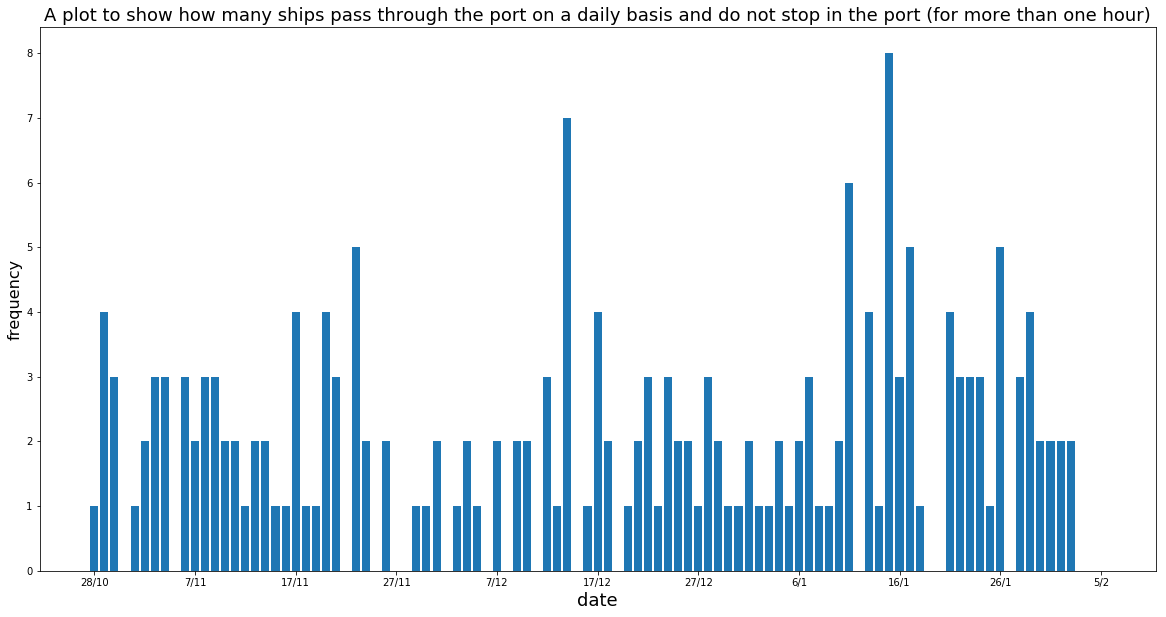

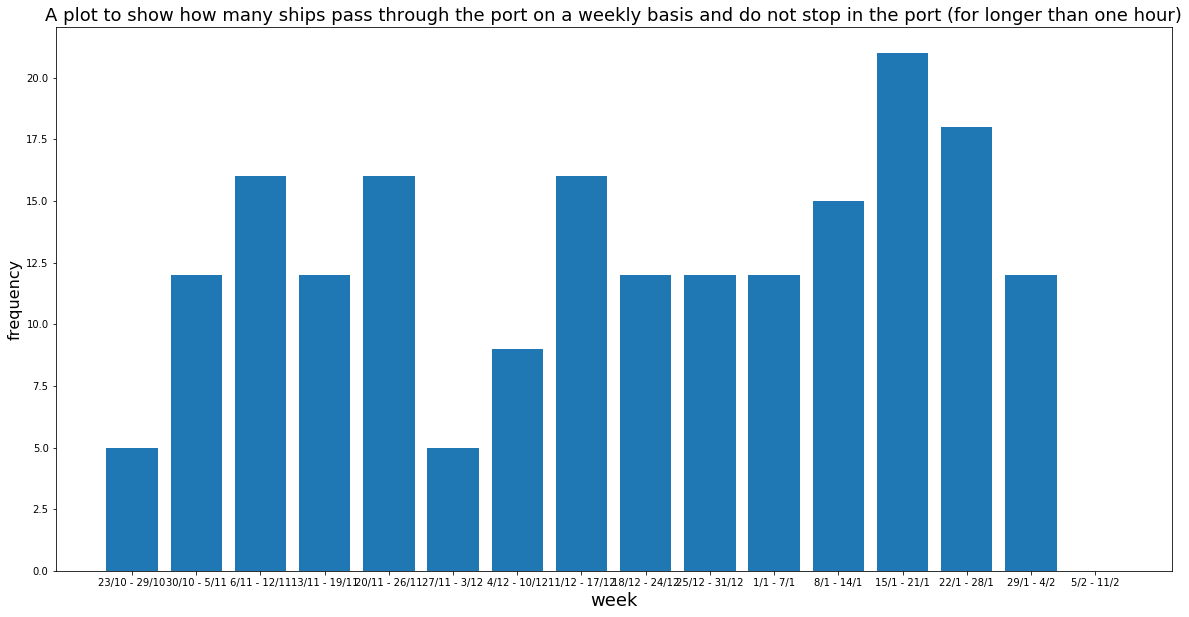

In [148]:
reader_merged = csv.reader(open('sample_port_calls_no_stops_merged.csv' , 'rU'))   #just changed this to the new, merged file

T_max = 3600 

year_count_2017 = 0
year_count_2018 = 0

month_count_Oct = 0
month_count_Nov = 0
month_count_Dec = 0
month_count_Jan = 0
month_count_Feb = 0
    
arr_Oct_28 = 0
arr_Oct_29 = 0
arr_Oct_30 = 0
arr_Oct_31 = 0

arr_Nov_1 = 0
arr_Nov_2 = 0
arr_Nov_3 = 0
arr_Nov_4 = 0
arr_Nov_5 = 0
arr_Nov_6 = 0
arr_Nov_7 = 0
arr_Nov_8 = 0
arr_Nov_9 = 0
arr_Nov_10 = 0
arr_Nov_11 = 0
arr_Nov_12 = 0
arr_Nov_13 = 0
arr_Nov_14 = 0
arr_Nov_15 = 0
arr_Nov_16 = 0
arr_Nov_17 = 0
arr_Nov_18 = 0
arr_Nov_19 = 0
arr_Nov_20 = 0
arr_Nov_21 = 0
arr_Nov_22 = 0
arr_Nov_23 = 0
arr_Nov_24 = 0
arr_Nov_25 = 0
arr_Nov_26 = 0
arr_Nov_27 = 0
arr_Nov_28 = 0
arr_Nov_29 = 0
arr_Nov_30 = 0

arr_Dec_1 = 0
arr_Dec_2 = 0
arr_Dec_3 = 0
arr_Dec_4 = 0
arr_Dec_5 = 0
arr_Dec_6 = 0
arr_Dec_7 = 0
arr_Dec_8 = 0
arr_Dec_9 = 0
arr_Dec_10 = 0
arr_Dec_11 = 0
arr_Dec_12 = 0
arr_Dec_13 = 0
arr_Dec_14 = 0
arr_Dec_15 = 0
arr_Dec_16 = 0
arr_Dec_17 = 0
arr_Dec_18 = 0
arr_Dec_19 = 0
arr_Dec_20 = 0
arr_Dec_21 = 0
arr_Dec_22 = 0
arr_Dec_23 = 0
arr_Dec_24 = 0
arr_Dec_25 = 0
arr_Dec_26 = 0
arr_Dec_27 = 0
arr_Dec_28 = 0
arr_Dec_29 = 0
arr_Dec_30 = 0
arr_Dec_31 = 0

arr_Jan_1 = 0
arr_Jan_2 = 0
arr_Jan_3 = 0
arr_Jan_4 = 0
arr_Jan_5 = 0
arr_Jan_6 = 0
arr_Jan_7 = 0
arr_Jan_8 = 0
arr_Jan_9 = 0
arr_Jan_10 = 0
arr_Jan_11 = 0
arr_Jan_12 = 0
arr_Jan_13 = 0
arr_Jan_14 = 0
arr_Jan_15 = 0
arr_Jan_16 = 0
arr_Jan_17 = 0
arr_Jan_18 = 0
arr_Jan_19 = 0
arr_Jan_20 = 0
arr_Jan_21 = 0
arr_Jan_22 = 0
arr_Jan_23 = 0
arr_Jan_24 = 0
arr_Jan_25 = 0
arr_Jan_26 = 0
arr_Jan_27 = 0
arr_Jan_28 = 0
arr_Jan_29 = 0
arr_Jan_30 = 0
arr_Jan_31 = 0

arr_Feb_1 = 0
arr_Feb_2 = 0
arr_Feb_3 = 0
arr_Feb_4 = 0
arr_Feb_5 = 0
arr_Feb_6 = 0
arr_Feb_7 = 0
arr_Feb_8 = 0
arr_Feb_9 = 0
arr_Feb_10 = 0
arr_Feb_11 = 0
arr_Feb_12 = 0
arr_Feb_13 = 0
arr_Feb_14 = 0
arr_Feb_15 = 0
arr_Feb_16 = 0
arr_Feb_17 = 0
arr_Feb_18 = 0
arr_Feb_19 = 0
arr_Feb_20 = 0
arr_Feb_21 = 0
arr_Feb_22 = 0
arr_Feb_23 = 0
arr_Feb_24 = 0
arr_Feb_25 = 0
arr_Feb_26 = 0
arr_Feb_27 = 0
arr_Feb_28 = 0

#and now for the weekly totals

wk1 = arr_wk_23_29_Oct_17 = 0
wk2 = arr_wk_30_Oct_5_Nov_17 = 0
wk3 = arr_wk_6_12_Nov_17 = 0
wk4 = arr_wk_13_19_Nov_17 = 0
wk5 = arr_wk_20_26_Nov_17 = 0
wk6 = arr_wk_27_Nov_3_Dec_17 = 0
wk7 = arr_wk_4_10_Dec_17 = 0
wk8 = arr_wk_11_17_Dec_17 = 0
wk9 = arr_wk_18_24_Dec_17 = 0
wk10 = arr_wk_25_31_Dec_17 = 0
wk11 = arr_wk_1_7_Jan_18 = 0
wk12 = arr_wk_8_14_Jan_18 = 0
wk13 = arr_wk_15_21_Jan_18 = 0
wk14 = arr_wk_22_28_Jan_18 = 0
wk15 = arr_wk_29_Jan_4_Feb_18 = 0
wk16 = arr_wk_5_11_Feb_18 = 0

prev = [""] * 23

prev[16] = [""]
prev[18] = [""]
prev[20] = [""]



for col in reader_merged:

#need to add in a few if statements to make sure we are capturing the correct arrival time for each event    

    
    if col[16] == prev[16] :           #need this to make sure we aren't counting data twice
            
        continue
        
    elif col[18] == "" and col[20] == "" :

        list_arr = col[16]
         
        if col[17] != "TIMENOW":       #actually maybe we don't need these if statements since there are no "TIMENOW"s in this data set. But keep in just in case needed in the future
        
            list_dep = col[17]
            
        else:
                
            print "Departure time unknown as data drawn when ship in dock"
    
    if col[18] == prev[18] :                 #also needed to make sure not counting data twice
    
        continue
                   
    elif col[18] != "" and col[20] == "" :
                
            list_arr = col[18]
        
            if col[19] != "TIMENOW":
        
                list_dep = col[19]
            
            else:
                
                print "Departure time unknown as data drawn when ship in dock"

    if col[20] == prev[20] :          #and once again to make sure not counting data twice
        
        continue
    
    elif col[18] != "" and col[20] != "" :
        
            list_arr = col[20]         
            
            if col[21] != ["TIMENOW"]:
                
                list_dep = col[21]
            
            else:
                
                print "Departure time unknown as data drawn when ship in dock"
            
    
    arr = parser.parse(list_arr)
    dep = parser.parse(list_dep)

    t_delta = dep - arr
    
    
    if t_delta.total_seconds() > T_max:
    
        print "This ship stayed for more than 1 hour in the port: " , col[1] , t_delta , ""
    
    
    prev[16] = col[16]
    prev[18] = col[18]
    prev[20] = col[20]
    
    prev = col
    
    
#keep track of the year

    if arr.year == 2017:
        
        year_count_2017 += 1
        
    if arr.year == 2018:
        
        year_count_2018 += 1
        
#October:


    if arr.month == 10:
       
        month_count_Oct += 1
 
        if arr.day == 28:
            
            arr_Oct_28 += 1
            wk1 += 1
        
        if arr.day == 29:
            
            arr_Oct_29 += 1
            wk1 += 1
            
        if arr.day == 30:
            
            arr_Oct_30 += 1
            wk2 += 1
            
        if arr.day == 31:
            
            arr_Oct_31 += 1
            wk2 += 1
                
                
#November:
                
    
    if arr.month == 11:
            
            month_count_Nov += 1
            
            if arr.day == 1:
                
                arr_Nov_1 += 1
                wk2 += 1
                
            if arr.day == 2:
                
                arr_Nov_2 += 1
                wk2 += 1
                
            if arr.day == 3:
                
                arr_Nov_3 += 1
                wk2 += 1
                
            if arr.day == 4:
                
                arr_Nov_4 += 1
                wk2 += 1
                
            if arr.day == 5:
                
                arr_Nov_5 += 1
                wk2 += 1
                
            if arr.day == 6:
                
                arr_Nov_6 += 1
                wk3 += 1
                
            if arr.day == 7:
                
                arr_Nov_7 += 1
                wk3 += 1
                
            if arr.day == 8:
                
                arr_Nov_8 += 1
                wk3 += 1
                
            if arr.day == 9:
                
                arr_Nov_9 += 1
                wk3 += 1
                
            if arr.day == 10:
                
                arr_Nov_10 += 1
                wk3 += 1
                
            if arr.day == 11:
                
                arr_Nov_11 += 1
                wk3 += 1
                
            if arr.day == 12:
                
                arr_Nov_12 += 1
                wk3 += 1
                
            if arr.day == 13:
                
                arr_Nov_13 += 1
                wk4 += 1
                
            if arr.day == 14:
                
                arr_Nov_14 += 1
                wk4 += 1
                
            if arr.day == 15:
                
                arr_Nov_15 += 1
                wk4 += 1
                
            if arr.day == 16:
                
                arr_Nov_16 += 1
                wk4 += 1
                
            if arr.day == 17:
                
                arr_Nov_17 += 1
                wk4 += 1
                
            if arr.day == 18:
                
                arr_Nov_18 += 1
                wk4 += 1
                
            if arr.day == 19:
                
                arr_Nov_19 += 1
                wk4 += 1
                
            if arr.day == 20:
                
                arr_Nov_20 += 1
                wk5 += 1
                
            if arr.day == 21:
                
                arr_Nov_21 += 1
                wk5 += 1
                
            if arr.day == 22:
                
                arr_Nov_22 += 1
                wk5 += 1
                
            if arr.day == 23:
                
                arr_Nov_23 += 1
                wk5 += 1
                
            if arr.day == 24:
                
                arr_Nov_24 += 1
                wk5 += 1
                
            if arr.day == 25:
                
                arr_Nov_25 += 1
                wk5 += 1
                
            if arr.day == 26:
                
                arr_Nov_26 += 1
                wk5 += 1
                
            if arr.day == 27:
                
                arr_Nov_27 += 1
                wk6 += 1
                
            if arr.day == 28:
                
                arr_Nov_28 += 1
                wk6 += 1
                
            if arr.day == 29:
                
                arr_Nov_29 += 1
                wk6 += 1
                
            if arr.day == 30:
                
                arr_Nov_30 += 1
                wk6 += 1
#December:            

    if arr.month == 12:
            
            month_count_Dec += 1
            
            if arr.day == 1:
                
                arr_Dec_1 += 1
                wk6 += 1
                
            if arr.day == 2:
                
                arr_Dec_2 += 1
                wk6 += 1
                
            if arr.day == 3:
                
                arr_Dec_3 += 1
                wk6 += 1
                
            if arr.day == 4:
                
                arr_Dec_4 += 1
                wk7 += 1
                
            if arr.day == 5:
                
                arr_Dec_5 += 1
                wk7 += 1
                
            if arr.day == 6:
                
                arr_Dec_6 += 1
                wk7 += 1
                
            if arr.day == 7:
                
                arr_Dec_7 += 1
                wk7 += 1
                
            if arr.day == 8:
                
                arr_Dec_8 += 1
                wk7 += 1
                
            if arr.day == 9:
                
                arr_Dec_9 += 1
                wk7 += 1
                
            if arr.day == 10:
                
                arr_Dec_10 += 1
                wk7 += 1
                
            if arr.day == 11:
                
                arr_Dec_11 += 1
                wk8 += 1
                
            if arr.day == 12:
                
                arr_Dec_12 += 1
                wk8 += 1
                
            if arr.day == 13:
                
                arr_Dec_13 += 1
                wk8 += 1
                
            if arr.day == 14:
                
                arr_Dec_14 += 1
                wk8 += 1
                
            if arr.day == 15:
                
                arr_Dec_15 += 1
                wk8 += 1
                
            if arr.day == 16:
                
                arr_Dec_16 += 1
                wk8 += 1
                
            if arr.day == 17:
                
                arr_Dec_17 += 1
                wk8 += 1
                
            if arr.day == 18:
                
                arr_Dec_18 += 1
                wk9 += 1
                
            if arr.day == 19:
                
                arr_Dec_19 += 1
                wk9 += 1
                
            if arr.day == 20:
                
                arr_Dec_20 += 1
                wk9 += 1
                
            if arr.day == 21:
                
                arr_Dec_21 += 1
                wk9 += 1
                
            if arr.day == 22:
                
                arr_Dec_22 += 1
                wk9 += 1
                
            if arr.day == 23:
                
                arr_Dec_23 += 1
                wk9 += 1
                
            if arr.day == 24:
                
                arr_Dec_24 += 1
                wk9 += 1
                
            if arr.day == 25:
                
                arr_Dec_25 += 1
                wk10 += 1
                
            if arr.day == 26:
                
                arr_Dec_26 += 1
                wk10 += 1
                
            if arr.day == 27:
                
                arr_Dec_27 += 1
                wk10 += 1
                
            if arr.day == 28:
                
                arr_Dec_28 += 1
                wk10 += 1
                
            if arr.day == 29:
                
                arr_Dec_29 += 1
                wk10 += 1
                
            if arr.day == 30:
                
                arr_Dec_30 += 1
                wk10 += 1
                
            if arr.day == 31:
                
                arr_Dec_31 += 1
                wk10 += 1

 #January:

    if arr.month == 1:
        
            month_count_Jan += 1
            
            if arr.day == 1:
                
                arr_Jan_1 += 1
                wk11 += 1
                
            if arr.day == 2:
                
                arr_Jan_2 += 1
                wk11 += 1
                
            if arr.day == 3:
                
                arr_Jan_3 += 1
                wk11 += 1
                
            if arr.day == 4:
                
                arr_Jan_4 += 1
                wk11 += 1
                
            if arr.day == 5:
                
                arr_Jan_5 += 1
                wk11 += 1
                
            if arr.day == 6:
                
                arr_Jan_6 += 1
                wk11 += 1
                
            if arr.day == 7:
                
                arr_Jan_7 += 1
                wk11 += 1
                
            if arr.day == 8:
                
                arr_Jan_8 += 1
                wk12 += 1
                
            if arr.day == 9:
                
                arr_Jan_9 += 1
                wk12 += 1
                
            if arr.day == 10:
                
                arr_Jan_10 += 1
                wk12 += 1
                
            if arr.day == 11:
                
                arr_Jan_11 += 1
                wk12 += 1
                
            if arr.day == 12:
                
                arr_Jan_12 += 1
                wk12 += 1
                
            if arr.day == 13:
                
                arr_Jan_13 += 1
                wk12 += 1
                
            if arr.day == 14:
                
                arr_Jan_14 += 1
                wk12 += 1
                
            if arr.day == 15:
                
                arr_Jan_15 += 1
                wk13 += 1
                
            if arr.day == 16:
                
                arr_Jan_16 += 1
                wk13 += 1
                
            if arr.day == 17:
                
                arr_Jan_17 += 1
                wk13 += 1
                
            if arr.day == 18:
                
                arr_Jan_18 += 1
                wk13 += 1
                
            if arr.day == 19:
                
                arr_Jan_19 += 1
                wk13 += 1
                
            if arr.day == 20:
                
                arr_Jan_20 += 1
                wk13 += 1
                
            if arr.day == 21:
                
                arr_Jan_21 += 1
                wk13 += 1
                
            if arr.day == 22:
                
                arr_Jan_22 += 1
                wk14 += 1
                
            if arr.day == 23:
                
                arr_Jan_23 += 1
                wk14 += 1
                
            if arr.day == 24:
                
                arr_Jan_24 += 1
                wk14 += 1
                
            if arr.day == 25:
                
                arr_Jan_25 += 1
                wk14 += 1
                
            if arr.day == 26:
                
                arr_Jan_26 += 1
                wk14 += 1
                
            if arr.day == 27:
                
                arr_Jan_27 += 1
                wk14 += 1
                
            if arr.day == 28:
                
                arr_Jan_28 += 1
                wk14 += 1
                
            if arr.day == 29:
                
                arr_Jan_29 += 1
                wk15 += 1
                
            if arr.day == 30:
                
                arr_Jan_30 += 1
                wk15 += 1
                
            if arr.day == 31:
                
                arr_Jan_31 += 1
                wk15 += 1
                
           
                
                
#February:        
        
    if arr.month == 2:
        
            month_count_Feb += 1
            
            if arr.day == 1:
                
                arr_Feb_1 += 1
                wk15 += 1
                
            if arr.day == 2:
                
                arr_Feb_2 += 1
                wk15 += 1
                
            if arr.day == 3:
                
                arr_Feb_3 += 1
                wk15 += 1
                
            if arr.day == 4:
                
                arr_Feb_4 += 1
                wk15 += 1
                
            if arr.day == 5:
                
                arr_Feb_5 += 1
                wk16 += 1
    
    
#Note: we previously needed to divide by two since for every data entry there is a port entry and port departure, and this information 
#is captured in just one of the rows. However now this data is intermixed with some that doesn't duplicate! So we need to
#filter out the data before we plot it, i.e. in the code above - DONE!


x_day = (arr_Oct_28,arr_Oct_29,arr_Oct_30,arr_Oct_31,arr_Nov_1,arr_Nov_2,arr_Nov_3,arr_Nov_4,arr_Nov_5,arr_Nov_6,arr_Nov_7,arr_Nov_8,arr_Nov_9,arr_Nov_10,arr_Nov_11,arr_Nov_12,arr_Nov_13,arr_Nov_14,arr_Nov_15,arr_Nov_16,arr_Nov_17,arr_Nov_18,arr_Nov_19,arr_Nov_20,arr_Nov_21,arr_Nov_22,arr_Nov_23,arr_Nov_24,arr_Nov_25,arr_Nov_26,arr_Nov_27,arr_Nov_28,arr_Nov_29,arr_Nov_30,arr_Dec_1,arr_Dec_2,arr_Dec_3,arr_Dec_4,arr_Dec_5,arr_Dec_6,arr_Dec_7,arr_Dec_8,arr_Dec_9,arr_Dec_10,arr_Dec_11,arr_Dec_12,arr_Dec_13,arr_Dec_14,arr_Dec_15,arr_Dec_16,arr_Dec_17,arr_Dec_18,arr_Dec_19,arr_Dec_20,arr_Dec_21,arr_Dec_22,arr_Dec_23,arr_Dec_24,arr_Dec_25,arr_Dec_26,arr_Dec_27,arr_Dec_28,arr_Dec_29,arr_Dec_30,arr_Dec_31,arr_Jan_1,arr_Jan_2,arr_Jan_3,arr_Jan_4,arr_Jan_5,arr_Jan_6,arr_Jan_7,arr_Jan_8,arr_Jan_9,arr_Jan_10,arr_Jan_11,arr_Jan_12,arr_Jan_13,arr_Jan_14,arr_Jan_15,arr_Jan_16,arr_Jan_17,arr_Jan_18,arr_Jan_19,arr_Jan_20,arr_Jan_21,arr_Jan_22,arr_Jan_23,arr_Jan_24,arr_Jan_25,arr_Jan_26,arr_Jan_27,arr_Jan_28,arr_Jan_29,arr_Jan_30,arr_Jan_31,arr_Feb_1,arr_Feb_2,arr_Feb_3,arr_Feb_4,arr_Feb_5)

y_day = ["28/10","29/10","30/10","31/10","1/11","2/11","3/11","4/11","5/11","6/11","7/11","8/11","9/11","10/11","11/11","12/11","13/11","14/11","15/11","16/11","17/11","18/11","19/11","20/11","21/11","22/11","23/11","24/11","25/11","26/11","27/11","28/11","29/11","30/11","1/12","2/12","3/12","4/12","5/12","6/12","7/12","8/12","9/12","10/12","11/12","12/12","13/12","14/12","15/12","16/12","17/12","18/12","19/12","20/12","21/12","22/12","23/12","24/12","25/12","26/12","27/12","28/12","29/12","30/12","31/12","1/1","2/1","3/1","4/1","5/1","6/1","7/1","8/1","9/1","10/1","11/1","12/1","13/1","14/1","15/1","16/1","17/1","18/1","19/1","20/1","21/1","22/1","23/1","24/1","25/1","26/1","27/1","28/1","29/1","30/1","31/1","1/2","2/2","3/2","4/2","5/2"]

fig, ax = plt.subplots()

ax.bar(y_day,x_day)

ax.set_xticks(ax.get_xticks()[::10])
plt.title('A plot to show how many ships pass through the port on a daily basis and do not stop in the port (for more than one hour)',fontsize=18)
plt.xlabel('date', fontsize=18)
plt.ylabel('frequency', fontsize=16)
plt.show()

#now let's do the weekly plot

x_week = (wk1,wk2,wk3,wk4,wk5,wk6,wk7,wk8,wk9,wk10,wk11,wk12,wk13,wk14,wk15,wk16)

y_week = ["23/10 - 29/10" , "30/10 - 5/11" , "6/11 - 12/11" , "13/11 - 19/11" , "20/11 - 26/11" , "27/11 - 3/12" , "4/12 - 10/12" , "11/12 - 17/12" , "18/12 - 24/12" , "25/12 - 31/12" , "1/1 - 7/1" , "8/1 - 14/1" , "15/1 - 21/1" , "22/1 - 28/1" , "29/1 - 4/2" , "5/2 - 11/2"]

plt.figure(figsize=(20,10))


plt.bar(y_week,x_week)

plt.title('A plot to show how many ships pass through the port on a weekly basis and do not stop in the port (for longer than one hour)',fontsize=18)
plt.xlabel('week', fontsize=18)
plt.ylabel('frequency', fontsize=16)
plt.show()

Okay so I think I'm happy with what I have so far. Some thoughts:

1) I haven't been able to note whether, for a ship that DOES stop for over an hour, if that ship has already stopped in that same port call - i.e. make sure we aren't duplicating the data for that specific ship in that port call. Can we do something about that? See point 3 below.

2) For the ships that DON'T stop for over an hour, we have only documented the date of arrival as the key indicator. Is this an acceptable thing to do? What if a given ship stays for a day or two, or overnight? Well overnight shouldn't be a big issue, as long as it leaves within 24 hours we can take the arrival date as a good indicator. But do any ships stay for longer than a full day? Let's check... there are - some stay for over a day - can easily make a log of those so if need to access this data in the future.

3) We previously needed to divide the final stats by two since for every data entry there was a port entry and port departure, and this information was captured in just one of the rows. However now this data is intermixed with some that doesn't duplicate. So we need to filter out the data before we plot it, i.e. in the code. But I've now taken care of that in the code above.

Looking much better now. What about the fact that we have some ships staying over 1 hour though - surely this is a stop (according to Anton's answer to my question we could include that as a stop, yes!) So we need to figure out why these few ships data made it into this sub-data set (the merged no_stops csv file). Having gone back and read my method, it looks like I just assumed that a port enter, port exit event was sufficient for us to say there wasn't a stop. But there sometimes was a stop as we know. Perhaps we should go back and revise our sorting of that original data into stops and no_stops - let's include a clause to reflect our new findings.

In [149]:
#first let's store our complete data set in a variable, called "reader"

reader = csv.reader(open('sample_top_row_removed.csv' , 'rb'))
no_stops = csv.writer(open('sample_port_calls_no_stops_final.csv' , 'wb'))       #set up our write to files
stops = csv.writer(open('sample_port_calls_with_stops_final.csv' , 'wb'))

T_max = 3600

prev = [""] * 23       #need prev array to store previous line. 23 columns in sample file

prev[7] = [""]         #store prev entry in 7th column as zero to begin with. 7th column contains type of event

for col in reader:
        
    #print prev[7]        quick check!

    if prev[7] == "port_enter" and col[7] == "port_exit":

        list_arr = col[16]
        list_dep = col[17]
        
        arr = parser.parse(list_arr)
        dep = parser.parse(list_dep)

        t_delta = dep - arr
    
        if t_delta.total_seconds() < T_max:           #note the "less than" sign
    
            #print "This ship stayed for less than 1 hour in the port: " , col[1] , t_delta , ""
        
            no_stops.writerow(prev)
            no_stops.writerow(col)
            
        else :
            
            stops.writerow(prev)
            stops.writerow(col)
        
    if (prev[7] == "port_enter" and col[7] != "port_exit"): 
        
            stops.writerow(prev)
            
    if col[7] == "facility_enter" or col[7] == "berth_enter" or col[7] == "enhanced_stop_begin" or col[7] == "facility_exit" or col[7] == "berth_exit" or col[7] == "enhanced_stop_end":
            
            stops.writerow(col)

    if col[7] == "port_exit" and prev[7] != "port_enter":
    
            stops.writerow(col)
            
    prev[7] = col[7]
    prev = col   
    


Now we need to re-merge the no_stops data files (after having generated the no_stops_more_final csv file in the next step!) 

*** so Anton - please run the NEXT block of code before the one immediately below, thanks! ***

In [153]:
#Now let's merge our two final "no stops" csv files:

reader_one = csv.reader(open('sample_port_calls_no_stops_final.csv' , 'rU'))
reader_two = csv.reader(open('sample_port_calls_no_stops_more_final.csv' , 'rU'))

writer = csv.writer(open('sample_port_calls_no_stops_merged_final.csv' , 'wb'))


for line in reader_one:
    
    writer.writerow(line)
    #print line
        
for line in reader_two:
    
    writer.writerow(line)
    #print line

And finally let's re-run our stats for both - stops first.

*** Note: need to run this block of code before the one above ***

Time unknown due to being in port at time data drawn
Time unknown due to being in port at time data drawn
Time unknown due to being in port at time data drawn
Time unknown due to being in port at time data drawn
Time unknown due to being in port at time data drawn
Time unknown due to being in port at time data drawn
Time unknown due to being in port at time data drawn
Time unknown due to being in port at time data drawn


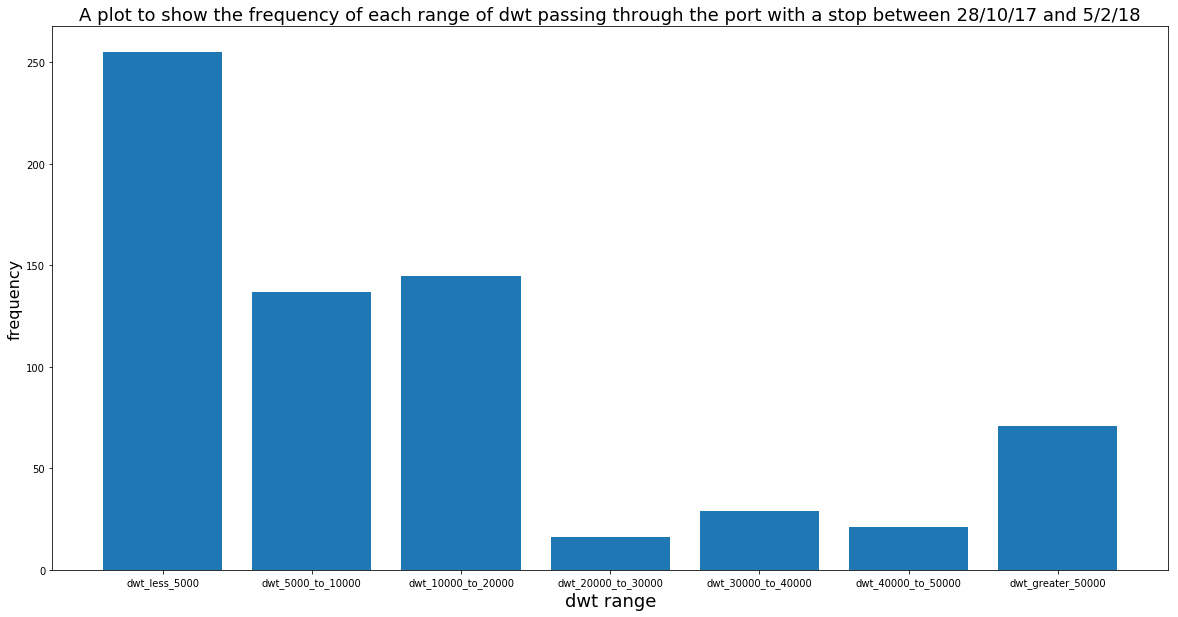

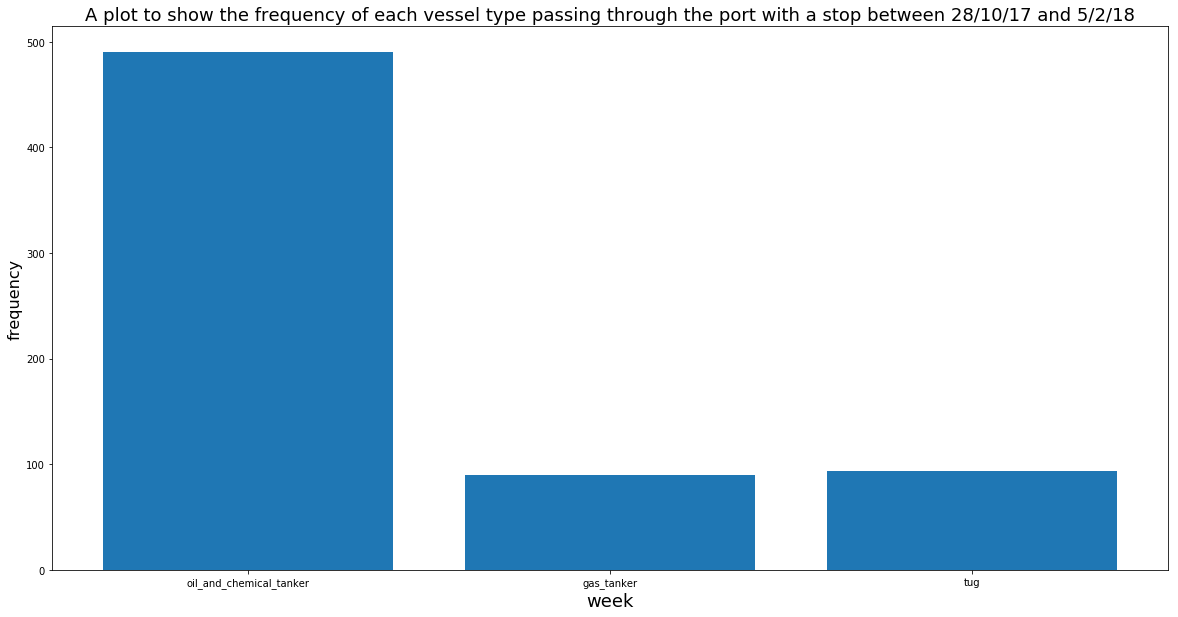

In [150]:
reader = csv.reader(open('sample_port_calls_with_stops_final.csv' , 'rb'))
no_stops_more = csv.writer(open('sample_port_calls_no_stops_more_final.csv' , 'wb'))


prev = [""] * 23
prev[7] = [""]

dwt = []
type_of_vessel = []

T_max = 3600        #this is the max time we set to define a stop, in seconds. Set to 1 hour = 60s * 60s = 3600s 


for col in reader:
    
    
    if prev[7] == "facility_enter" and col[7] == "facility_exit":
        
        if col[17] !=  "TIMENOW" and col[19] != "TIMENOW" and col[21]  != "TIMENOW":
        
            t_enh_stop_begin_facility = col[18]
            t_enh_stop_end_facility = col[19]
        
            t_facility_begin = parser.parse(t_enh_stop_begin_facility)
            t_facility_end = parser.parse(t_enh_stop_end_facility)
        
            t_facility_delta = t_facility_end - t_facility_begin
        
            if t_facility_delta.total_seconds() > T_max:

                #print "ship stopped fully at facility"
                
                type_of_vessel.append(col[2])
                dwt.append(col[6])
                
            else:
                
                #print "NO STOP in facility"
                
                no_stops_more.writerow(prev)
                no_stops_more.writerow(col)
                
        else:
            
            print "Time unknown due to being in port at time data drawn"
        
        
        
    if prev[7] == "berth_enter" and col[7] == "berth_exit":
        
        if col[17] !=  "TIMENOW" and col[19] != "TIMENOW" and col[21]  != "TIMENOW":
        
            t_enh_stop_begin_berth = col[20]
            t_enh_stop_end_berth = col[21]
    
            t_berth_begin = parser.parse(t_enh_stop_begin_berth)
            t_berth_end = parser.parse(t_enh_stop_end_berth)
        
            t_berth_delta = t_berth_end - t_berth_begin
        
            if t_berth_delta.total_seconds() > T_max:

                #print "ship stopped fully at berth"
                
                type_of_vessel.append(col[2])
                dwt.append(col[6])
                
            else:
                
                #print "NO STOP in berth"
                
                no_stops_more.writerow(prev)
                no_stops_more.writerow(col)
        
        else:
            
            print "Time unknown due to being in port at time data drawn"
            
        
    if prev[7] == "enhanced_stop_begin" and col[7] == "enhanced_stop_end":
        
        if col[17] !=  "TIMENOW" and col[19] != "TIMENOW" and col[21]  != "TIMENOW":
            
            t_enh_stop_begin = col[20]
            t_enh_stop_end = col[21]
        
            t_enh_begin = parser.parse(t_enh_stop_begin)
            t_enh_end = parser.parse(t_enh_stop_end)
        
            t_enh_stop_delta = t_enh_end - t_enh_begin
        
            if t_enh_stop_delta.total_seconds() > T_max:

                #print "ship stopped fully for enhanced stop"
                
                type_of_vessel.append(col[2])
                dwt.append(col[6])
                
            else:
                
                #print "NO STOP for enhanced stop"
                
                no_stops_more.writerow(prev)
                no_stops_more.writerow(col)
        
        else:
            
            print "Time unknown due to being in port at time data drawn"

        
    if prev[7] == "berth_enter" and col[7] == "enhanced_stop_begin":
        
        if col[17] !=  "TIMENOW" and col[19] != "TIMENOW" and col[21]  != "TIMENOW":
        
            t_enh_stop_begin = col[20]
            t_enh_stop_end = col[21]
        
            t_enh_begin = parser.parse(t_enh_stop_begin)
            t_enh_end = parser.parse(t_enh_stop_end)
        
            t_enh_stop_delta = t_enh_end - t_enh_begin
            
            
            if t_enh_stop_delta.total_seconds() > T_max:

                #print "ship stopped fully for enhanced stop in berth"
                
                type_of_vessel.append(col[2])
                dwt.append(col[6])
                
            else:
                
                #print "NO STOP for enhanced stop in berth"
                
                no_stops_more.writerow(prev)
                no_stops_more.writerow(col)

        else:
            
            print "Time unknown due to being in port at time data drawn"       

        
  #  if prev[7] == "berth_exit" and col[7] == "berth_enter":
        
  #      if col[17] !=  "TIMENOW" and col[19] != "TIMENOW" and col[21]  != "TIMENOW":
        
  #          t_enh_stop_begin_berth = col[20]
  #          t_enh_stop_end_berth = col[21]
    
  #          t_berth_begin = parser.parse(t_enh_stop_begin_berth)
  #          t_berth_end = parser.parse(t_enh_stop_end_berth)
        
  #          t_berth_delta = t_berth_end - t_berth_begin
        
  #          if t_berth_delta.total_seconds() > T_max:

                #print "ship stopped fully at berth for another time"
                
  #              type_of_vessel.append(col[2])
  #              dwt.append(col[6])
                
  #          else:
                
                #print "NO STOP in berth for another time"
                
  #              no_stops_more.writerow(prev)
  #              no_stops_more.writerow(col)
        
  #      else:
            
  #          print "Time unknown due to being in port at time data drawn"
        
        
    if prev[7] == "port_enter" and col[7] == "enhanced_stop_begin":
        
        if col[17] !=  "TIMENOW" and col[19] != "TIMENOW" and col[21]  != "TIMENOW":
        
            t_enh_stop_begin_port = col[16]
            t_enh_stop_end_port = col[17]
        
            t_port_begin = parser.parse(t_enh_stop_begin_port)
            t_port_end = parser.parse(t_enh_stop_end_port)
        
            t_port_delta = t_port_end - t_port_begin
        
            if t_port_delta.total_seconds() > T_max:

                #print "ship stopped fully at port for enhanced stop"
                
                type_of_vessel.append(col[2])
                dwt.append(col[6])
                
            else:
                
                #print "NO STOP in berth for enhanced stop"
                
                no_stops_more.writerow(prev)
                no_stops_more.writerow(col)
        
        else:
            
            print "Time unknown due to being in port at time data drawn"
            
            
    prev[7] = col[7]
    prev = col
 


 #Ok so now let's build some stats!


dwt_freq = []

for f in dwt:
    dwt_freq.append(dwt.count(f))
    
#print dwt_freq

type_of_vessel_freq = []

for t in type_of_vessel:
    type_of_vessel_freq.append(type_of_vessel.count(t))
    

#So the dwt is rarely going to be the same, since each cargo will weigh different! So a better thing to do is 
#to display a RANGE of dwts. Let's do this!


dwt_less_5000_tally = 0
dwt_5000_to_10000_tally = 0
dwt_10000_to_20000_tally = 0
dwt_20000_to_30000_tally = 0
dwt_30000_to_40000_tally = 0
dwt_40000_to_50000_tally = 0
dwt_greater_50000_tally = 0

#need to convert dwt into integer list

dwt = map(int,dwt)


for i in dwt:
    
    if i <= 5000:
    
        dwt_less_5000_tally += 1
        
    if i > 5000 and i <= 10000:
    
        dwt_5000_to_10000_tally += 1
    
    if i > 10000 and i <= 20000:
    
        dwt_10000_to_20000_tally += 1
        
    if i > 20000 and i <= 30000:
    
        dwt_20000_to_30000_tally += 1
        
    if i > 30000 and i <= 40000:
    
        dwt_30000_to_40000_tally += 1
        
    if i > 40000 and i <= 50000:
    
        dwt_40000_to_50000_tally += 1
        
    if i > 50000:
    
        dwt_greater_50000_tally += 1



dwt_list = ['dwt_less_5000' , 'dwt_5000_to_10000' , 'dwt_10000_to_20000' , 'dwt_20000_to_30000' , 'dwt_30000_to_40000' , 'dwt_40000_to_50000' , 'dwt_greater_50000']

#print dwt_list
    
plt.figure(figsize=(20,10))

plt.bar(dwt_list , (dwt_less_5000_tally, dwt_5000_to_10000_tally, dwt_10000_to_20000_tally, dwt_20000_to_30000_tally, dwt_30000_to_40000_tally, dwt_40000_to_50000_tally, dwt_greater_50000_tally) )
plt.title('A plot to show the frequency of each range of dwt passing through the port with a stop between 28/10/17 and 5/2/18',fontsize=18)
plt.xlabel('dwt range', fontsize=18)
plt.ylabel('frequency', fontsize=16)
plt.show()  


plt.figure(figsize=(20,10))

plt.bar(type_of_vessel, type_of_vessel_freq)
plt.title('A plot to show the frequency of each vessel type passing through the port with a stop between 28/10/17 and 5/2/18',fontsize=18)
plt.xlabel('week', fontsize=18)
plt.ylabel('frequency', fontsize=16)
plt.show()  

And now no_stops:

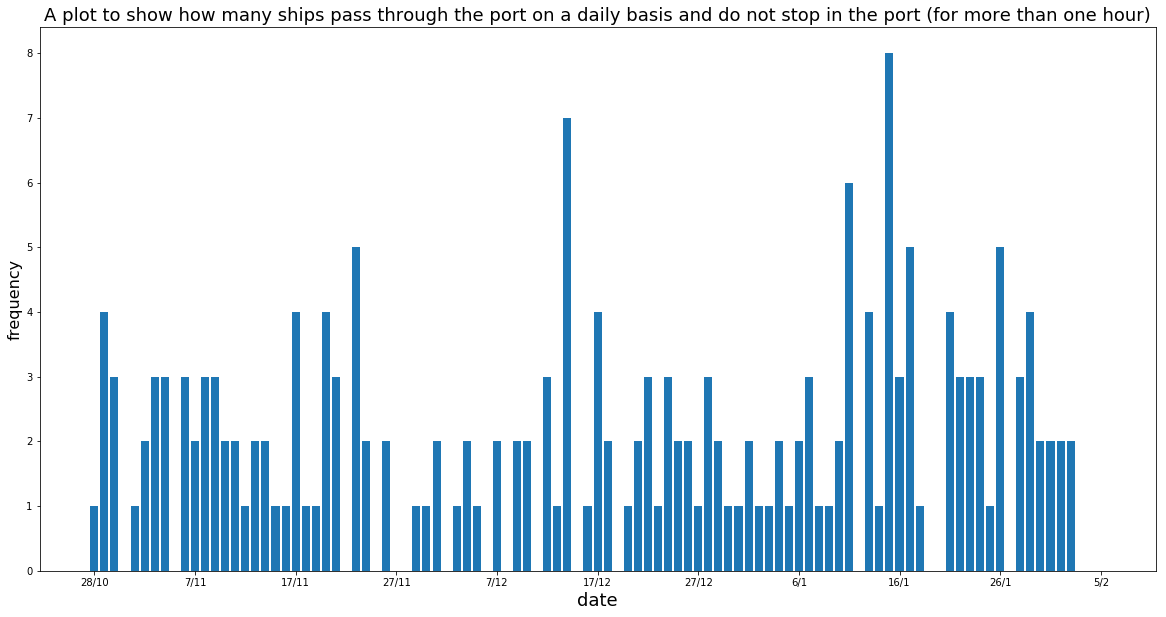

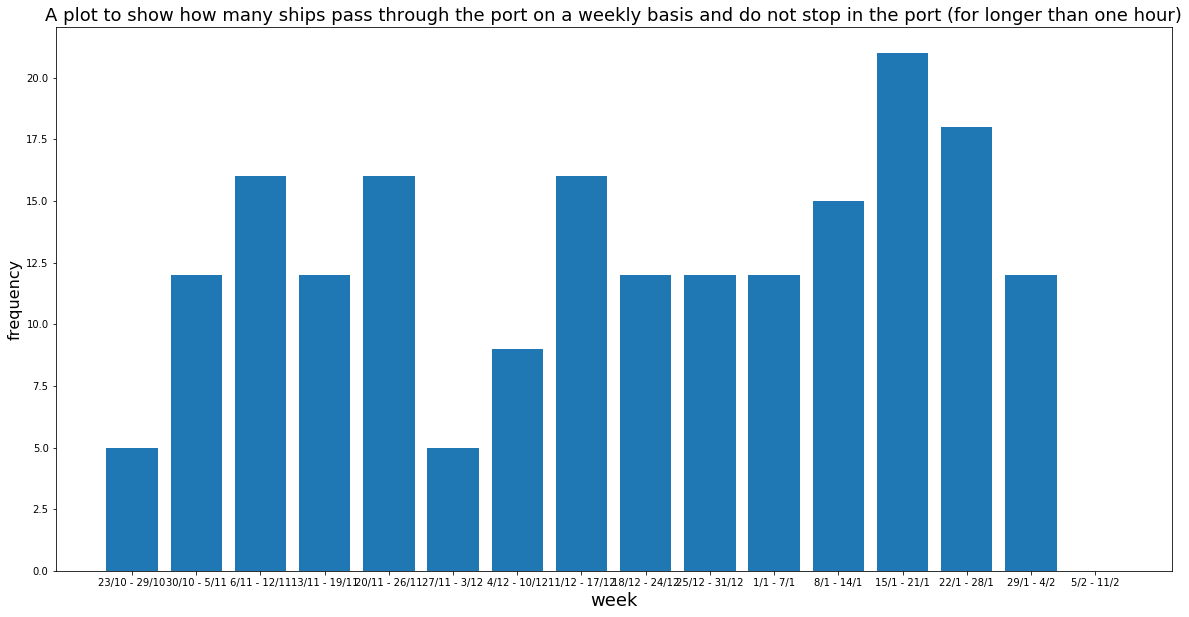

In [154]:
reader_merged = csv.reader(open('sample_port_calls_no_stops_merged_final.csv' , 'rb'))   #just changed this to the new, merged file

T_max = 3600 

year_count_2017 = 0
year_count_2018 = 0

month_count_Oct = 0
month_count_Nov = 0
month_count_Dec = 0
month_count_Jan = 0
month_count_Feb = 0
    
arr_Oct_28 = 0
arr_Oct_29 = 0
arr_Oct_30 = 0
arr_Oct_31 = 0

arr_Nov_1 = 0
arr_Nov_2 = 0
arr_Nov_3 = 0
arr_Nov_4 = 0
arr_Nov_5 = 0
arr_Nov_6 = 0
arr_Nov_7 = 0
arr_Nov_8 = 0
arr_Nov_9 = 0
arr_Nov_10 = 0
arr_Nov_11 = 0
arr_Nov_12 = 0
arr_Nov_13 = 0
arr_Nov_14 = 0
arr_Nov_15 = 0
arr_Nov_16 = 0
arr_Nov_17 = 0
arr_Nov_18 = 0
arr_Nov_19 = 0
arr_Nov_20 = 0
arr_Nov_21 = 0
arr_Nov_22 = 0
arr_Nov_23 = 0
arr_Nov_24 = 0
arr_Nov_25 = 0
arr_Nov_26 = 0
arr_Nov_27 = 0
arr_Nov_28 = 0
arr_Nov_29 = 0
arr_Nov_30 = 0

arr_Dec_1 = 0
arr_Dec_2 = 0
arr_Dec_3 = 0
arr_Dec_4 = 0
arr_Dec_5 = 0
arr_Dec_6 = 0
arr_Dec_7 = 0
arr_Dec_8 = 0
arr_Dec_9 = 0
arr_Dec_10 = 0
arr_Dec_11 = 0
arr_Dec_12 = 0
arr_Dec_13 = 0
arr_Dec_14 = 0
arr_Dec_15 = 0
arr_Dec_16 = 0
arr_Dec_17 = 0
arr_Dec_18 = 0
arr_Dec_19 = 0
arr_Dec_20 = 0
arr_Dec_21 = 0
arr_Dec_22 = 0
arr_Dec_23 = 0
arr_Dec_24 = 0
arr_Dec_25 = 0
arr_Dec_26 = 0
arr_Dec_27 = 0
arr_Dec_28 = 0
arr_Dec_29 = 0
arr_Dec_30 = 0
arr_Dec_31 = 0

arr_Jan_1 = 0
arr_Jan_2 = 0
arr_Jan_3 = 0
arr_Jan_4 = 0
arr_Jan_5 = 0
arr_Jan_6 = 0
arr_Jan_7 = 0
arr_Jan_8 = 0
arr_Jan_9 = 0
arr_Jan_10 = 0
arr_Jan_11 = 0
arr_Jan_12 = 0
arr_Jan_13 = 0
arr_Jan_14 = 0
arr_Jan_15 = 0
arr_Jan_16 = 0
arr_Jan_17 = 0
arr_Jan_18 = 0
arr_Jan_19 = 0
arr_Jan_20 = 0
arr_Jan_21 = 0
arr_Jan_22 = 0
arr_Jan_23 = 0
arr_Jan_24 = 0
arr_Jan_25 = 0
arr_Jan_26 = 0
arr_Jan_27 = 0
arr_Jan_28 = 0
arr_Jan_29 = 0
arr_Jan_30 = 0
arr_Jan_31 = 0

arr_Feb_1 = 0
arr_Feb_2 = 0
arr_Feb_3 = 0
arr_Feb_4 = 0
arr_Feb_5 = 0
arr_Feb_6 = 0
arr_Feb_7 = 0
arr_Feb_8 = 0
arr_Feb_9 = 0
arr_Feb_10 = 0
arr_Feb_11 = 0
arr_Feb_12 = 0
arr_Feb_13 = 0
arr_Feb_14 = 0
arr_Feb_15 = 0
arr_Feb_16 = 0
arr_Feb_17 = 0
arr_Feb_18 = 0
arr_Feb_19 = 0
arr_Feb_20 = 0
arr_Feb_21 = 0
arr_Feb_22 = 0
arr_Feb_23 = 0
arr_Feb_24 = 0
arr_Feb_25 = 0
arr_Feb_26 = 0
arr_Feb_27 = 0
arr_Feb_28 = 0

#and now for the weekly totals

wk1 = arr_wk_23_29_Oct_17 = 0
wk2 = arr_wk_30_Oct_5_Nov_17 = 0
wk3 = arr_wk_6_12_Nov_17 = 0
wk4 = arr_wk_13_19_Nov_17 = 0
wk5 = arr_wk_20_26_Nov_17 = 0
wk6 = arr_wk_27_Nov_3_Dec_17 = 0
wk7 = arr_wk_4_10_Dec_17 = 0
wk8 = arr_wk_11_17_Dec_17 = 0
wk9 = arr_wk_18_24_Dec_17 = 0
wk10 = arr_wk_25_31_Dec_17 = 0
wk11 = arr_wk_1_7_Jan_18 = 0
wk12 = arr_wk_8_14_Jan_18 = 0
wk13 = arr_wk_15_21_Jan_18 = 0
wk14 = arr_wk_22_28_Jan_18 = 0
wk15 = arr_wk_29_Jan_4_Feb_18 = 0
wk16 = arr_wk_5_11_Feb_18 = 0

prev = [""] * 23

prev[16] = [""]
prev[18] = [""]
prev[20] = [""]



for col in reader_merged:

#need to add in a few if statements to make sure we are capturing the correct arrival time for each event    

    #print col[1]
    
    if col[16] == prev[16] :           #need this to make sure we aren't counting data twice
            
        continue
        
    elif col[18] == "" and col[20] == "" :

        list_arr = col[16]
         
        if col[17] != "TIMENOW":       #actually maybe we don't need these if statements since there are no "TIMENOW"s in this data set. But keep in just in case needed in the future
        
            list_dep = col[17]
            
        else:
                
            print "Departure time unknown as data drawn when ship in dock"
    
    if col[18] == prev[18] :                 #also needed to make sure not counting data twice
    
        continue
                   
    elif col[18] != "" and col[20] == "" :
                
            list_arr = col[18]
        
            if col[19] != "TIMENOW":
        
                list_dep = col[19]
            
            else:
                
                print "Departure time unknown as data drawn when ship in dock"

    if col[20] == prev[20] :          #and once again to make sure not counting data twice
        
        continue
    
    elif col[18] != "" and col[20] != "" :
        
            list_arr = col[20]         
            
            if col[21] != ["TIMENOW"]:
                
                list_dep = col[21]
            
            else:
                
                print "Departure time unknown as data drawn when ship in dock"
            
    
    arr = parser.parse(list_arr)
    dep = parser.parse(list_dep)

    t_delta = dep - arr
    
    
    if t_delta.total_seconds() > T_max:
    
        print "This ship stayed for more than 1 hour in the port: " , col[1] , t_delta , ""    #quick check
    
    
    prev[16] = col[16]
    prev[18] = col[18]
    prev[20] = col[20]
    
    prev = col
    
    
#keep track of the year

    if arr.year == 2017:
        
        year_count_2017 += 1
        
    if arr.year == 2018:
        
        year_count_2018 += 1
        
#October:


    if arr.month == 10:
       
        month_count_Oct += 1
 
        if arr.day == 28:
            
            arr_Oct_28 += 1
            wk1 += 1
        
        if arr.day == 29:
            
            arr_Oct_29 += 1
            wk1 += 1
            
        if arr.day == 30:
            
            arr_Oct_30 += 1
            wk2 += 1
            
        if arr.day == 31:
            
            arr_Oct_31 += 1
            wk2 += 1
                
                
#November:
                
    
    if arr.month == 11:
            
            month_count_Nov += 1
            
            if arr.day == 1:
                
                arr_Nov_1 += 1
                wk2 += 1
                
            if arr.day == 2:
                
                arr_Nov_2 += 1
                wk2 += 1
                
            if arr.day == 3:
                
                arr_Nov_3 += 1
                wk2 += 1
                
            if arr.day == 4:
                
                arr_Nov_4 += 1
                wk2 += 1
                
            if arr.day == 5:
                
                arr_Nov_5 += 1
                wk2 += 1
                
            if arr.day == 6:
                
                arr_Nov_6 += 1
                wk3 += 1
                
            if arr.day == 7:
                
                arr_Nov_7 += 1
                wk3 += 1
                
            if arr.day == 8:
                
                arr_Nov_8 += 1
                wk3 += 1
                
            if arr.day == 9:
                
                arr_Nov_9 += 1
                wk3 += 1
                
            if arr.day == 10:
                
                arr_Nov_10 += 1
                wk3 += 1
                
            if arr.day == 11:
                
                arr_Nov_11 += 1
                wk3 += 1
                
            if arr.day == 12:
                
                arr_Nov_12 += 1
                wk3 += 1
                
            if arr.day == 13:
                
                arr_Nov_13 += 1
                wk4 += 1
                
            if arr.day == 14:
                
                arr_Nov_14 += 1
                wk4 += 1
                
            if arr.day == 15:
                
                arr_Nov_15 += 1
                wk4 += 1
                
            if arr.day == 16:
                
                arr_Nov_16 += 1
                wk4 += 1
                
            if arr.day == 17:
                
                arr_Nov_17 += 1
                wk4 += 1
                
            if arr.day == 18:
                
                arr_Nov_18 += 1
                wk4 += 1
                
            if arr.day == 19:
                
                arr_Nov_19 += 1
                wk4 += 1
                
            if arr.day == 20:
                
                arr_Nov_20 += 1
                wk5 += 1
                
            if arr.day == 21:
                
                arr_Nov_21 += 1
                wk5 += 1
                
            if arr.day == 22:
                
                arr_Nov_22 += 1
                wk5 += 1
                
            if arr.day == 23:
                
                arr_Nov_23 += 1
                wk5 += 1
                
            if arr.day == 24:
                
                arr_Nov_24 += 1
                wk5 += 1
                
            if arr.day == 25:
                
                arr_Nov_25 += 1
                wk5 += 1
                
            if arr.day == 26:
                
                arr_Nov_26 += 1
                wk5 += 1
                
            if arr.day == 27:
                
                arr_Nov_27 += 1
                wk6 += 1
                
            if arr.day == 28:
                
                arr_Nov_28 += 1
                wk6 += 1
                
            if arr.day == 29:
                
                arr_Nov_29 += 1
                wk6 += 1
                
            if arr.day == 30:
                
                arr_Nov_30 += 1
                wk6 += 1
#December:            

    if arr.month == 12:
            
            month_count_Dec += 1
            
            if arr.day == 1:
                
                arr_Dec_1 += 1
                wk6 += 1
                
            if arr.day == 2:
                
                arr_Dec_2 += 1
                wk6 += 1
                
            if arr.day == 3:
                
                arr_Dec_3 += 1
                wk6 += 1
                
            if arr.day == 4:
                
                arr_Dec_4 += 1
                wk7 += 1
                
            if arr.day == 5:
                
                arr_Dec_5 += 1
                wk7 += 1
                
            if arr.day == 6:
                
                arr_Dec_6 += 1
                wk7 += 1
                
            if arr.day == 7:
                
                arr_Dec_7 += 1
                wk7 += 1
                
            if arr.day == 8:
                
                arr_Dec_8 += 1
                wk7 += 1
                
            if arr.day == 9:
                
                arr_Dec_9 += 1
                wk7 += 1
                
            if arr.day == 10:
                
                arr_Dec_10 += 1
                wk7 += 1
                
            if arr.day == 11:
                
                arr_Dec_11 += 1
                wk8 += 1
                
            if arr.day == 12:
                
                arr_Dec_12 += 1
                wk8 += 1
                
            if arr.day == 13:
                
                arr_Dec_13 += 1
                wk8 += 1
                
            if arr.day == 14:
                
                arr_Dec_14 += 1
                wk8 += 1
                
            if arr.day == 15:
                
                arr_Dec_15 += 1
                wk8 += 1
                
            if arr.day == 16:
                
                arr_Dec_16 += 1
                wk8 += 1
                
            if arr.day == 17:
                
                arr_Dec_17 += 1
                wk8 += 1
                
            if arr.day == 18:
                
                arr_Dec_18 += 1
                wk9 += 1
                
            if arr.day == 19:
                
                arr_Dec_19 += 1
                wk9 += 1
                
            if arr.day == 20:
                
                arr_Dec_20 += 1
                wk9 += 1
                
            if arr.day == 21:
                
                arr_Dec_21 += 1
                wk9 += 1
                
            if arr.day == 22:
                
                arr_Dec_22 += 1
                wk9 += 1
                
            if arr.day == 23:
                
                arr_Dec_23 += 1
                wk9 += 1
                
            if arr.day == 24:
                
                arr_Dec_24 += 1
                wk9 += 1
                
            if arr.day == 25:
                
                arr_Dec_25 += 1
                wk10 += 1
                
            if arr.day == 26:
                
                arr_Dec_26 += 1
                wk10 += 1
                
            if arr.day == 27:
                
                arr_Dec_27 += 1
                wk10 += 1
                
            if arr.day == 28:
                
                arr_Dec_28 += 1
                wk10 += 1
                
            if arr.day == 29:
                
                arr_Dec_29 += 1
                wk10 += 1
                
            if arr.day == 30:
                
                arr_Dec_30 += 1
                wk10 += 1
                
            if arr.day == 31:
                
                arr_Dec_31 += 1
                wk10 += 1

 #January:

    if arr.month == 1:
        
            month_count_Jan += 1
            
            if arr.day == 1:
                
                arr_Jan_1 += 1
                wk11 += 1
                
            if arr.day == 2:
                
                arr_Jan_2 += 1
                wk11 += 1
                
            if arr.day == 3:
                
                arr_Jan_3 += 1
                wk11 += 1
                
            if arr.day == 4:
                
                arr_Jan_4 += 1
                wk11 += 1
                
            if arr.day == 5:
                
                arr_Jan_5 += 1
                wk11 += 1
                
            if arr.day == 6:
                
                arr_Jan_6 += 1
                wk11 += 1
                
            if arr.day == 7:
                
                arr_Jan_7 += 1
                wk11 += 1
                
            if arr.day == 8:
                
                arr_Jan_8 += 1
                wk12 += 1
                
            if arr.day == 9:
                
                arr_Jan_9 += 1
                wk12 += 1
                
            if arr.day == 10:
                
                arr_Jan_10 += 1
                wk12 += 1
                
            if arr.day == 11:
                
                arr_Jan_11 += 1
                wk12 += 1
                
            if arr.day == 12:
                
                arr_Jan_12 += 1
                wk12 += 1
                
            if arr.day == 13:
                
                arr_Jan_13 += 1
                wk12 += 1
                
            if arr.day == 14:
                
                arr_Jan_14 += 1
                wk12 += 1
                
            if arr.day == 15:
                
                arr_Jan_15 += 1
                wk13 += 1
                
            if arr.day == 16:
                
                arr_Jan_16 += 1
                wk13 += 1
                
            if arr.day == 17:
                
                arr_Jan_17 += 1
                wk13 += 1
                
            if arr.day == 18:
                
                arr_Jan_18 += 1
                wk13 += 1
                
            if arr.day == 19:
                
                arr_Jan_19 += 1
                wk13 += 1
                
            if arr.day == 20:
                
                arr_Jan_20 += 1
                wk13 += 1
                
            if arr.day == 21:
                
                arr_Jan_21 += 1
                wk13 += 1
                
            if arr.day == 22:
                
                arr_Jan_22 += 1
                wk14 += 1
                
            if arr.day == 23:
                
                arr_Jan_23 += 1
                wk14 += 1
                
            if arr.day == 24:
                
                arr_Jan_24 += 1
                wk14 += 1
                
            if arr.day == 25:
                
                arr_Jan_25 += 1
                wk14 += 1
                
            if arr.day == 26:
                
                arr_Jan_26 += 1
                wk14 += 1
                
            if arr.day == 27:
                
                arr_Jan_27 += 1
                wk14 += 1
                
            if arr.day == 28:
                
                arr_Jan_28 += 1
                wk14 += 1
                
            if arr.day == 29:
                
                arr_Jan_29 += 1
                wk15 += 1
                
            if arr.day == 30:
                
                arr_Jan_30 += 1
                wk15 += 1
                
            if arr.day == 31:
                
                arr_Jan_31 += 1
                wk15 += 1
                
           
                
                
#February:        
        
    if arr.month == 2:
        
            month_count_Feb += 1
            
            if arr.day == 1:
                
                arr_Feb_1 += 1
                wk15 += 1
                
            if arr.day == 2:
                
                arr_Feb_2 += 1
                wk15 += 1
                
            if arr.day == 3:
                
                arr_Feb_3 += 1
                wk15 += 1
                
            if arr.day == 4:
                
                arr_Feb_4 += 1
                wk15 += 1
                
            if arr.day == 5:
                
                arr_Feb_5 += 1
                wk16 += 1
    
    
#Note: we need to divide by two since for every data entry there is a port entry and port departure, but this information 
#is captured in just one of the rows. However now this data is intermixed with some that doesn't duplicate! So we need to
#filter out the data before we plot it, i.e. in the code. Let's do it!


x_day = (arr_Oct_28,arr_Oct_29,arr_Oct_30,arr_Oct_31,arr_Nov_1,arr_Nov_2,arr_Nov_3,arr_Nov_4,arr_Nov_5,arr_Nov_6,arr_Nov_7,arr_Nov_8,arr_Nov_9,arr_Nov_10,arr_Nov_11,arr_Nov_12,arr_Nov_13,arr_Nov_14,arr_Nov_15,arr_Nov_16,arr_Nov_17,arr_Nov_18,arr_Nov_19,arr_Nov_20,arr_Nov_21,arr_Nov_22,arr_Nov_23,arr_Nov_24,arr_Nov_25,arr_Nov_26,arr_Nov_27,arr_Nov_28,arr_Nov_29,arr_Nov_30,arr_Dec_1,arr_Dec_2,arr_Dec_3,arr_Dec_4,arr_Dec_5,arr_Dec_6,arr_Dec_7,arr_Dec_8,arr_Dec_9,arr_Dec_10,arr_Dec_11,arr_Dec_12,arr_Dec_13,arr_Dec_14,arr_Dec_15,arr_Dec_16,arr_Dec_17,arr_Dec_18,arr_Dec_19,arr_Dec_20,arr_Dec_21,arr_Dec_22,arr_Dec_23,arr_Dec_24,arr_Dec_25,arr_Dec_26,arr_Dec_27,arr_Dec_28,arr_Dec_29,arr_Dec_30,arr_Dec_31,arr_Jan_1,arr_Jan_2,arr_Jan_3,arr_Jan_4,arr_Jan_5,arr_Jan_6,arr_Jan_7,arr_Jan_8,arr_Jan_9,arr_Jan_10,arr_Jan_11,arr_Jan_12,arr_Jan_13,arr_Jan_14,arr_Jan_15,arr_Jan_16,arr_Jan_17,arr_Jan_18,arr_Jan_19,arr_Jan_20,arr_Jan_21,arr_Jan_22,arr_Jan_23,arr_Jan_24,arr_Jan_25,arr_Jan_26,arr_Jan_27,arr_Jan_28,arr_Jan_29,arr_Jan_30,arr_Jan_31,arr_Feb_1,arr_Feb_2,arr_Feb_3,arr_Feb_4,arr_Feb_5)

y_day = ["28/10","29/10","30/10","31/10","1/11","2/11","3/11","4/11","5/11","6/11","7/11","8/11","9/11","10/11","11/11","12/11","13/11","14/11","15/11","16/11","17/11","18/11","19/11","20/11","21/11","22/11","23/11","24/11","25/11","26/11","27/11","28/11","29/11","30/11","1/12","2/12","3/12","4/12","5/12","6/12","7/12","8/12","9/12","10/12","11/12","12/12","13/12","14/12","15/12","16/12","17/12","18/12","19/12","20/12","21/12","22/12","23/12","24/12","25/12","26/12","27/12","28/12","29/12","30/12","31/12","1/1","2/1","3/1","4/1","5/1","6/1","7/1","8/1","9/1","10/1","11/1","12/1","13/1","14/1","15/1","16/1","17/1","18/1","19/1","20/1","21/1","22/1","23/1","24/1","25/1","26/1","27/1","28/1","29/1","30/1","31/1","1/2","2/2","3/2","4/2","5/2"]

fig, ax = plt.subplots()

ax.bar(y_day,x_day)

ax.set_xticks(ax.get_xticks()[::10])
plt.title('A plot to show how many ships pass through the port on a daily basis and do not stop in the port (for more than one hour)',fontsize=18)
plt.xlabel('date', fontsize=18)
plt.ylabel('frequency', fontsize=16)
plt.show()

#now let's do the weekly plot

x_week = (wk1,wk2,wk3,wk4,wk5,wk6,wk7,wk8,wk9,wk10,wk11,wk12,wk13,wk14,wk15,wk16)

y_week = ["23/10 - 29/10" , "30/10 - 5/11" , "6/11 - 12/11" , "13/11 - 19/11" , "20/11 - 26/11" , "27/11 - 3/12" , "4/12 - 10/12" , "11/12 - 17/12" , "18/12 - 24/12" , "25/12 - 31/12" , "1/1 - 7/1" , "8/1 - 14/1" , "15/1 - 21/1" , "22/1 - 28/1" , "29/1 - 4/2" , "5/2 - 11/2"]

plt.figure(figsize=(20,10))


plt.bar(y_week,x_week)

plt.title('A plot to show how many ships pass through the port on a weekly basis and do not stop in the port (for longer than one hour)',fontsize=18)
plt.xlabel('week', fontsize=18)
plt.ylabel('frequency', fontsize=16)
plt.show()

One thing I notice, I am "missing" around ten lines of data from the original file (did a quick estimate from the sizes of the files I have generated). Not sure what has happened to this data! If I had more time I think I could get to the bottom of it...

I think I'm happy with my work so far - if I had more time I'd like to play a bit more with the stats, test the code a bit more and get to the bottom of this missing data issue outlined above. But I've spent a few days on it now and think now is a good time to stop. It'd be nice to get some feedback on the task and see how close I have come to completing it fully.

Some self-appraisal, if you will:

1) I guess there was a quicker way to make a list of the dates, but I coulnd't figure it out in 30 minutes so just moved on (did it manually)

2) My csv merging code, there was maybe a better way to do that. It was taking up to 20 minutes for some of them.

3) My comments in between blocks may have been a bit waffly, but I like to get down my thoughts, hope that's okay!